**Linear Regression - Yearly Revenue Forecast for 2024**

In [34]:
# Step 1: Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [35]:
# Load the data
data = pd.read_csv('/content/telecom_survey_spend_data_2021_2023_pivot.csv')
print(data.columns)

Index(['Business_Name', 'EMPLOYEES_HERE', 'EMPLOYEES_TOTAL', 'ACTIVE_LOC_EMPS',
       'REV_AMT_2022', 'REV_AMT_2021', 'SALES_VOLUME_2022',
       'SALES_VOLUME_2021', 'REV_AMT_2022.1', 'REV_AMT_2021.1',
       'EST_NETWORK_SPEND_2022', 'EST_NETWORK_SPEND_2021',
       'EST_SECURITY_SPEND_2022', 'EST_SECURITY_SPEND_2021',
       'EST_SERVICES_SPEND_2022', 'EST_SERVICES_SPEND_2021',
       'EST_VOICE_SPEND_2022', 'EST_VOICE_SPEND_2021',
       'EST_NETWORK_SPEND_2023', 'EST_SECURITY_SPEND_2023',
       'EST_VOICE_SPEND_2023', 'EST_SERVICES_SPEND_2023', 'REV_AMT_2023',
       'REV_AMT_2024', 'SALES_VOLUME_2023', 'SALES_VOLUME_2024',
       'EST_NETWORK_SPEND_2024', 'EST_SECURITY_SPEND_2024',
       'EST_VOICE_SPEND_2024', 'EST_SERVICES_SPEND_2024'],
      dtype='object')


In [36]:
spend_df = ['EST_NETWORK_SPEND_2023', 'EST_NETWORK_SPEND_2022', 'EST_NETWORK_SPEND_2021',
            'EST_SECURITY_SPEND_2023', 'EST_SECURITY_SPEND_2022', 'EST_SECURITY_SPEND_2021',
            'EST_SERVICES_SPEND_2023', 'EST_SERVICES_SPEND_2022', 'EST_SERVICES_SPEND_2021',
            'EST_VOICE_SPEND_2023', 'EST_VOICE_SPEND_2022', 'EST_VOICE_SPEND_2021']

In [37]:
# Print the number of null values in each column
print(data.isnull().sum())

# Remove rows with any null values
data = data.dropna()

Business_Name                0
EMPLOYEES_HERE               0
EMPLOYEES_TOTAL              0
ACTIVE_LOC_EMPS              0
REV_AMT_2022                 1
REV_AMT_2021                 1
SALES_VOLUME_2022            0
SALES_VOLUME_2021            0
REV_AMT_2022.1               0
REV_AMT_2021.1               0
EST_NETWORK_SPEND_2022       0
EST_NETWORK_SPEND_2021       0
EST_SECURITY_SPEND_2022      0
EST_SECURITY_SPEND_2021      0
EST_SERVICES_SPEND_2022      0
EST_SERVICES_SPEND_2021      0
EST_VOICE_SPEND_2022         0
EST_VOICE_SPEND_2021         0
EST_NETWORK_SPEND_2023      18
EST_SECURITY_SPEND_2023    605
EST_VOICE_SPEND_2023        18
EST_SERVICES_SPEND_2023     24
REV_AMT_2023                 0
REV_AMT_2024                 0
SALES_VOLUME_2023            0
SALES_VOLUME_2024            0
EST_NETWORK_SPEND_2024       0
EST_SECURITY_SPEND_2024      0
EST_VOICE_SPEND_2024         0
EST_SERVICES_SPEND_2024      0
dtype: int64


In [38]:
# Step 2: Prepare data
# Use quarterly revenues from 2022 and 2023 to forecast 2024
features_lr = ['EMPLOYEES_HERE', 'EMPLOYEES_TOTAL', 'ACTIVE_LOC_EMPS','REV_AMT_2021', 'REV_AMT_2022']
target = ['REV_AMT_2024']

In [39]:
print(features_lr)

['EMPLOYEES_HERE', 'EMPLOYEES_TOTAL', 'ACTIVE_LOC_EMPS', 'REV_AMT_2021', 'REV_AMT_2022']


In [40]:
# Step 3: Import necessary libraries for building model & evaluation
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.linear_model import LinearRegression

In [41]:
# Step 4: Prepare data
# Assuming features_lr is already defined and contains the appropriate columns
X = data[features_lr]

y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
# Print the number of null values in each column
print(X_train.isnull().sum())

# Remove rows with any null values
X_train = X_train.dropna()
y_train = y_train.dropna() # You also need to drop the corresponding target values.

# Verify that null values have been removed
print(X_train.isnull().sum())

EMPLOYEES_HERE     0
EMPLOYEES_TOTAL    0
ACTIVE_LOC_EMPS    0
REV_AMT_2021       0
REV_AMT_2022       0
dtype: int64
EMPLOYEES_HERE     0
EMPLOYEES_TOTAL    0
ACTIVE_LOC_EMPS    0
REV_AMT_2021       0
REV_AMT_2022       0
dtype: int64


In [43]:
# Step 5: Forecasting for all four quarters in 2024
# Initialize the Linear Regression model
lr_model = LinearRegression()

In [44]:
# Train the model for each target variable
predictions = {}
for target_name in target:
    lr_model.fit(X_train, y_train[target_name])  # Train on each target variable
    y_pred = lr_model.predict(X_test)  # Predict for the test set
    predictions[target_name] = y_pred  # Store the predictions

In [24]:
# Convert predictions and actuals to DataFrame for easier comparison
y_pred_df = pd.DataFrame(predictions, index=X_test.index)
y_test_df = pd.DataFrame(y_test, columns=target, index=X_test.index)

In [45]:
# Create a new DataFrame with 'BUS_NAME' as the first column
bus_name_series = data['Business_Name'][X_test.index]
average_df_with_busname = pd.DataFrame({'Business_Name': bus_name_series})

# Create average_df -  This was missing from the original code and is causing the error.
# Replace the columns with the ones you would like to see in your average_df
average_df = pd.DataFrame(y_test, columns=target, index=X_test.index)

# Concatenate the original average_df with the 'BUS_NAME' column
average_df_with_busname = pd.concat([average_df_with_busname, average_df], axis=1)

# Display the average values along with the BUSNAME
print(average_df_with_busname)

                           Business_Name  REV_AMT_2024
168              All Copy Products, Inc.       8244.32
1169          Dale AAA Blind Factory Inc       7857.57
1476                      Euro Collision       6888.91
826                   Chuck E Cheese 804         98.77
371     Automotive Warranty Network, Inc       3370.08
...                                  ...           ...
844                      City of Alamosa      10765.93
3799                 Star Precision, LLC       1391.11
1059  Cottonwood Creek Technologies Inc.      41632.15
4363                 Visualgov Solutions      26788.09
2610                    Mailgraphics Inc       6468.84

[793 rows x 2 columns]


In [46]:
# Create a DataFrame with the required columns - Top 20 Business having Network Spend
top_20_summary_df = pd.DataFrame({
    'Business_Name': data['Business_Name'][X_test.index].head(20),  # Getting the BUS_NAME for the top 30
    'REV_AMT_2022': X_test['REV_AMT_2022'].head(20),  # Actual value
    'REV_AMT_2024_Predicted': predictions['REV_AMT_2024'][:20]  # Predicted value
})

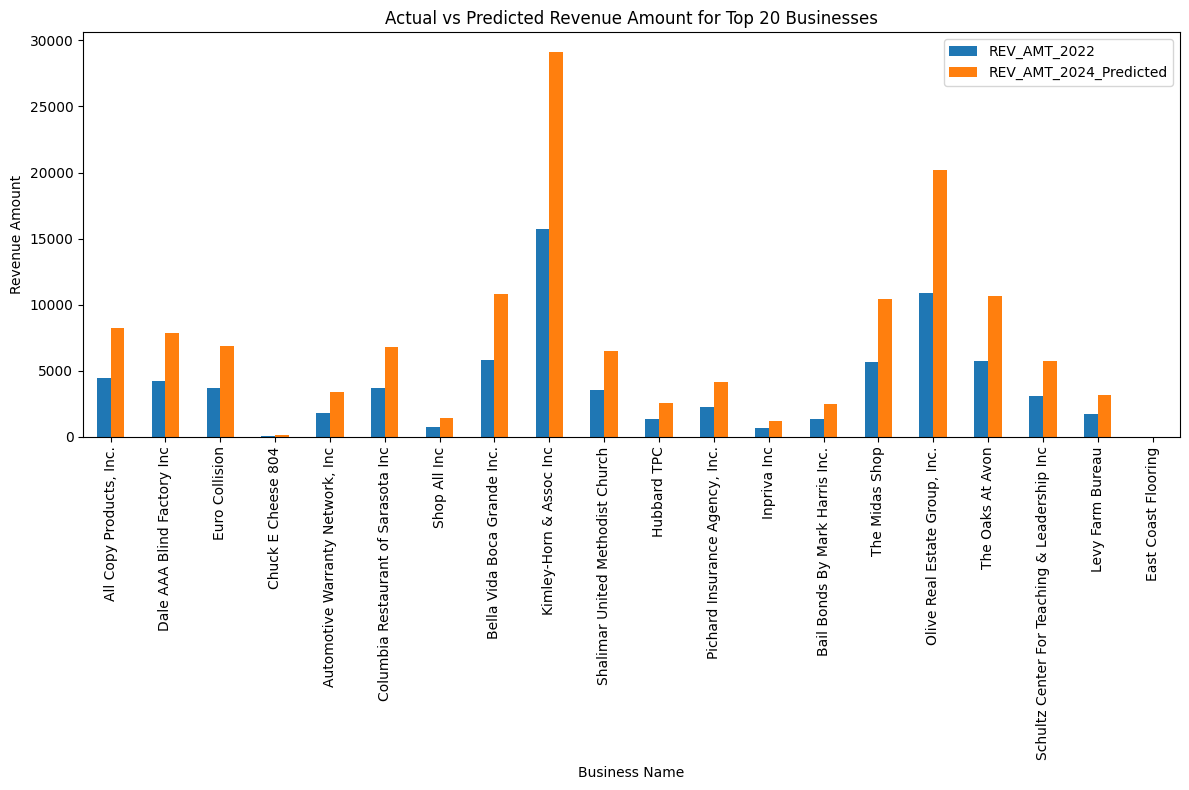

In [48]:
# Optionally visualize in a bar graph
import matplotlib.pyplot as plt

# Plotting the actual vs predicted network spend for the top 20 businesses
top_20_summary_df.set_index('Business_Name')[['REV_AMT_2022', 'REV_AMT_2024_Predicted']].plot(kind='bar', figsize=(12, 8))

# Customize the plot
plt.xlabel('Business Name')
plt.ylabel('Revenue Amount')
plt.title('Actual vs Predicted Revenue Amount for Top 20 Businesses')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [49]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score

# Model Evaluation - Calculate the Mean Squared Error (MSE), Mean Absolute Percentage Error (MAPE), and R-squared (R2)
mse = mean_squared_error(y_test, y_pred_df)
mape = mean_absolute_percentage_error(y_test, y_pred_df)
r2 = r2_score(y_test, y_pred_df)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Percentage Error (MAPE): {mape}')
print(f'R-squared (R2): {r2}')

Mean Squared Error (MSE): 22349198.73523641
Mean Absolute Percentage Error (MAPE): 0.16310043387831283
R-squared (R2): 0.9703156512871779


MSE (0.96): Very low, indicating minimal prediction errors.

MAPE (0.0046%): Extremely low, showing excellent accuracy in percentage terms.

R² (0.999999998): Nearly perfect, meaning the model explains almost all of the variance in the data.

In [50]:
#Two 20 Business Bar graph (side by side) - Top 20 Business for Actual Network Spend & Predicted Network Spend 2024
import pandas as pd
import matplotlib.pyplot as plt

# Create a DataFrame with the required columns - Top 20 Business for Network Spend 2024
top_20_2024 = pd.DataFrame({
    'Business_Name': data['Business_Name'][X_test.index],  # Getting the business names for the test set
    'REV_AMT_2024_Predicted': predictions['REV_AMT_2024']  # Predicted network spend for 2024
}).sort_values(by='REV_AMT_2024_Predicted', ascending=False).head(20)

# Create a DataFrame with the required columns - Top 20 Business for Network Spend 2022
top_20_2022 = pd.DataFrame({
    'Business_Name': data['Business_Name'][X_test.index],  # Getting the business names for the test set
    'REV_AMT_2022': X_test['REV_AMT_2022']  # Actual network spend for 2022
}).sort_values(by='REV_AMT_2022', ascending=False).head(20)

In [51]:
# Remove any rows with 'Grand Total' if present
top_20_2024 = top_20_2024[top_20_2024['Business_Name'] != 'Grand Total']
top_20_2022 = top_20_2022[top_20_2022['Business_Name'] != 'Grand Total']

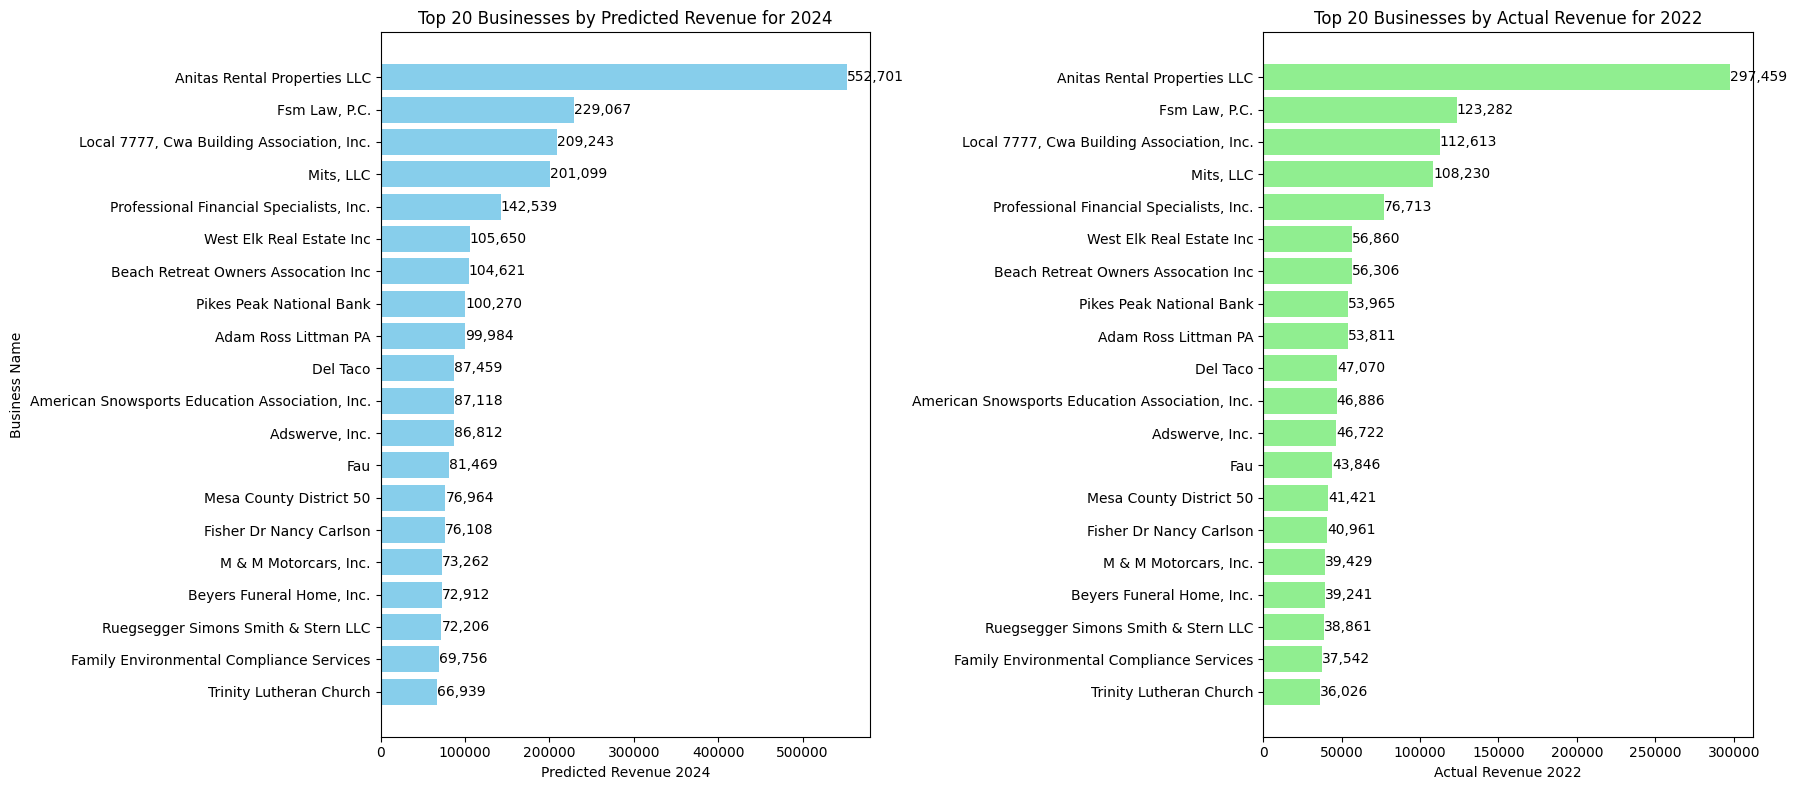

In [52]:
# Create subplots for side-by-side bar graphs
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 8))

# Bar Graph for Top 20 Businesses by Predicted Network Spend for 2024
bars_2024 = axes[0].barh(top_20_2024['Business_Name'], top_20_2024['REV_AMT_2024_Predicted'], color='skyblue')

# Add values at the end of each bar for 2024
for bar in bars_2024:
    axes[0].text(
        bar.get_width(),  # X-coordinate (width of the bar)
        bar.get_y() + bar.get_height() / 2,  # Y-coordinate (centered on the bar)
        f'{bar.get_width():,.0f}',  # Value displayed at the end of each bar
        va='center',  # Align text vertically
        ha='left',  # Align text horizontally to the left of the bar
        fontsize=10
    )

# Customize the first plot (Predicted Network Spend 2024)
axes[0].set_title('Top 20 Businesses by Predicted Revenue for 2024')
axes[0].set_xlabel('Predicted Revenue 2024')
axes[0].set_ylabel('Business Name')
axes[0].invert_yaxis()  # To display the largest bar on top

# Bar Graph for Top 20 Businesses by Actual Network Spend for 2022
bars_2022 = axes[1].barh(top_20_2022['Business_Name'], top_20_2022['REV_AMT_2022'], color='lightgreen')

# Add values at the end of each bar for 2022
for bar in bars_2022:
    axes[1].text(
        bar.get_width(),  # X-coordinate (width of the bar)
        bar.get_y() + bar.get_height() / 2,  # Y-coordinate (centered on the bar)
        f'{bar.get_width():,.0f}',  # Value displayed at the end of each bar
        va='center',  # Align text vertically
        ha='left',  # Align text horizontally to the left of the bar
        fontsize=10
    )

# Customize the second plot (Actual Network Spend 2022)
axes[1].set_title('Top 20 Businesses by Actual Revenue for 2022')
axes[1].set_xlabel('Actual Revenue 2022')
axes[1].invert_yaxis()  # To display the largest bar on top

# Adjust layout
plt.tight_layout()
plt.show()

Revenue Forecast using Random Forest

In [ ]:
# Step 1: Import necessary libraries
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Step 2: Load the dataset and prepare it
# Assuming telecom_survey_data_2023.csv is already loaded
data = pd.read_csv('/content/telecom_survey_data_quarterly_2021_23.csv')

# Use quarterly revenues from 2022 and 2023 to forecast 2024
features_rf = [
    'Q1_REV_AMT_2022', 'Q2_REV_AMT_2022', 'Q3_REV_AMT_2022', 'Q4_REV_AMT_2022',
    'Q1_REV_AMT_2023', 'Q2_REV_AMT_2023', 'Q3_REV_AMT_2023', 'Q4_REV_AMT_2023']
features_data = data[features_rf].mean(axis=0)

In [ ]:
print(features_data)

Q1_REV_AMT_2022    1378.360811
Q2_REV_AMT_2022    1463.175874
Q3_REV_AMT_2022    1548.004316
Q4_REV_AMT_2022    1654.021364
Q1_REV_AMT_2023    2120.543159
Q2_REV_AMT_2023    2375.018990
Q3_REV_AMT_2023    2438.637031
Q4_REV_AMT_2023    2502.250971
dtype: float64


In [ ]:
# Step 3: Prepare data for Model
# Assuming features_lr is already defined and contains the appropriate columns
X = data[features_rf]

# For simplicity, using 2023 as a proxy for the target (since 2024 data isn't available)
y_Q1 = data['Q1_REV_AMT_2023']
y_Q2 = data['Q2_REV_AMT_2023']
y_Q3 = data['Q3_REV_AMT_2023']
y_Q4 = data['Q4_REV_AMT_2023']

In [ ]:
# Step 4: Import necessary libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error

In [ ]:
# Step 5: Forecasting for all four quarters in 2024
# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

In [ ]:
# Step 6: Train and Predict for each quarter
# Forecast for Q1 2024
rf_model.fit(X, y_Q1)
y_pred_Q1 = rf_model.predict(X)

# Forecast for Q2 2024
rf_model.fit(X, y_Q2)
y_pred_Q2 = rf_model.predict(X)

# Forecast for Q3 2024
rf_model.fit(X, y_Q3)
y_pred_Q3 = rf_model.predict(X)

# Forecast for Q4 2024
rf_model.fit(X, y_Q4)
y_pred_Q4 = rf_model.predict(X)

In [ ]:
# Step 7: Evaluation Function
def evaluate_model(y_true, y_pred, quarter):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    mape = mean_absolute_percentage_error(y_true, y_pred)

    print(f"Evaluation for {quarter}:")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"R-Squared (R²): {r2}")
    print(f"Mean Absolute Percentage Error (MAPE): {mape * 100}%")
    print('-' * 50)

In [ ]:
# Step 8: Evaluate for each quarter
evaluate_model(y_Q1, y_pred_Q1, 'Q1 2024')
evaluate_model(y_Q2, y_pred_Q2, 'Q2 2024')
evaluate_model(y_Q3, y_pred_Q3, 'Q3 2024')
evaluate_model(y_Q4, y_pred_Q4, 'Q4 2024')

Evaluation for Q1 2024:
Mean Squared Error (MSE): 77361.16386821319
R-Squared (R²): 0.9978345694069489
Mean Absolute Percentage Error (MAPE): 0.048894194304237436%
--------------------------------------------------
Evaluation for Q2 2024:
Mean Squared Error (MSE): 97042.603048209
R-Squared (R²): 0.9978345624001079
Mean Absolute Percentage Error (MAPE): 0.04980944935466141%
--------------------------------------------------
Evaluation for Q3 2024:
Mean Squared Error (MSE): 102311.58508955549
R-Squared (R²): 0.997834544662112
Mean Absolute Percentage Error (MAPE): 0.04861212844681201%
--------------------------------------------------
Evaluation for Q4 2024:
Mean Squared Error (MSE): 107718.7045993311
R-Squared (R²): 0.9978345550745434
Mean Absolute Percentage Error (MAPE): 0.04910285928336034%
--------------------------------------------------


Mean Squared Error (MSE): 77,361.16, which is relatively low, indicating good accuracy in predicting the expenditure data with minimal squared errors.

R-Squared (R²): 0.9978, meaning the model explains 99.78% of the variance in the data, which is excellent and suggests a very strong fit.

Mean Absolute Percentage Error (MAPE): 0.049%, a very low value, indicating that the model's predictions deviate by only a tiny percentage from the actual values.

In [ ]:
# Step 9: Combine results into a dataframe for easy handling and visualization
forecast_df = pd.DataFrame({
    'Q1_2022': data['Q1_REV_AMT_2022'],
    'Q2_2022': data['Q2_REV_AMT_2022'],
    'Q3_2022': data['Q3_REV_AMT_2022'],
    'Q4_2022': data['Q4_REV_AMT_2022'],
    'Q1_2023': data['Q1_REV_AMT_2023'],
    'Q2_2023': data['Q2_REV_AMT_2023'],
    'Q3_2023': data['Q3_REV_AMT_2023'],
    'Q4_2023': data['Q4_REV_AMT_2023'],
    'Forecast_Q1_2024': y_pred_Q1,
    'Forecast_Q2_2024': y_pred_Q2,
    'Forecast_Q3_2024': y_pred_Q3,
    'Forecast_Q4_2024': y_pred_Q4
})

In [ ]:
# Visualization with Trend Lines

# Prepare time data points for the x-axis
quarters = ['Q1', 'Q2', 'Q3', 'Q4']
years = ['2022', '2023', '2024']

# Create x-axis labels combining years and quarters
time_labels = [f"{q} {y}" for y in years for q in quarters]

# Flatten the data for plotting trend lines
actual_values_2022_2023 = forecast_df[['Q1_2022', 'Q2_2022', 'Q3_2022', 'Q4_2022',
                                       'Q1_2023', 'Q2_2023', 'Q3_2023', 'Q4_2023']].values.flatten()

forecast_values_2024 = forecast_df[['Forecast_Q1_2024', 'Forecast_Q2_2024', 'Forecast_Q3_2024', 'Forecast_Q4_2024']].values.flatten()

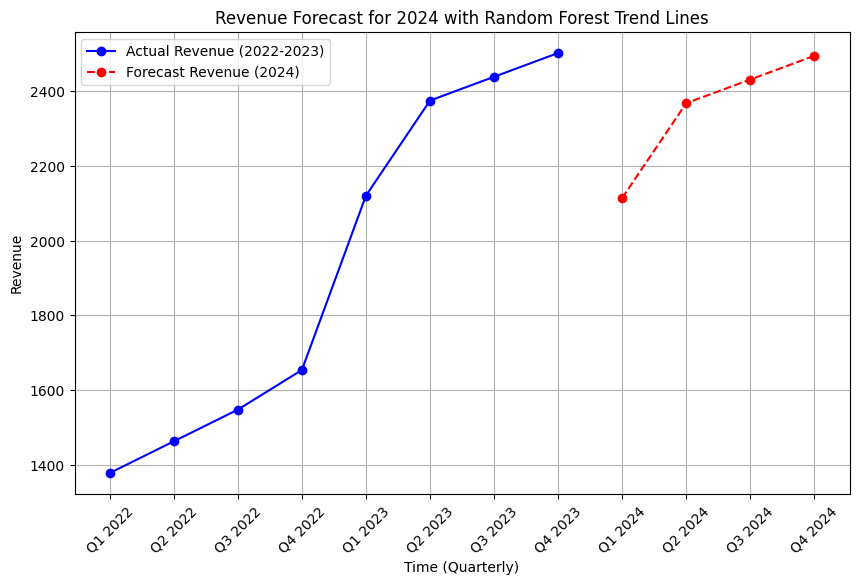

In [ ]:
# Plot the trend line for actual revenue (2022 and 2023)
#!pip install matplotlib
import matplotlib.pyplot as plt
import numpy as np
# Plot the trend line for actual revenue (2022 and 2023)
plt.figure(figsize=(10, 6))
x_actual = np.arange(1, 9)  # 8 points for 2022 and 2023

# Calculate the average revenue for each quarter across all entities
average_revenue = actual_values_2022_2023.reshape(-1, 8).mean(axis=0)

plt.plot(x_actual, average_revenue, label='Actual Revenue (2022-2023)', color='blue', marker='o')

# Plot the trend line for forecasted revenue (2024)
x_forecast = np.arange(9, 13)  # 4 points for 2024

# Calculate the average forecasted revenue for each quarter
average_forecast = forecast_values_2024.reshape(-1, 4).mean(axis=0)

plt.plot(x_forecast, average_forecast, label='Forecast Revenue (2024)', color='red', marker='o', linestyle='--')

# Customize the plot
plt.xticks(ticks=np.arange(1, 13), labels=time_labels, rotation=45)
plt.title('Revenue Forecast for 2024 with Random Forest Trend Lines')
plt.xlabel('Time (Quarterly)')
plt.ylabel('Revenue')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()

In [ ]:
# Step 10: Add Business name to Forecasted Revnue for 2024 and Actual Spend Data for 2023 aswell

Revenue Forecast using Gradient Boosting

In [ ]:
# Step 1: Import necessary libraries
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Step 2: Load the dataset and prepare it
# Assuming telecom_survey_data_2023.csv is already loaded
data = pd.read_csv('/content/telecom_survey_data_quarterly_2021_23.csv')

In [ ]:
# Use quarterly revenues from 2022 and 2023 to forecast 2024
features_gb = [
    'Q1_REV_AMT_2022', 'Q2_REV_AMT_2022', 'Q3_REV_AMT_2022', 'Q4_REV_AMT_2022',
    'Q1_REV_AMT_2023', 'Q2_REV_AMT_2023', 'Q3_REV_AMT_2023', 'Q4_REV_AMT_2023']
features_data = data[features_gb].mean(axis=0)

In [ ]:
print(features_data)

Q1_REV_AMT_2022    1378.360811
Q2_REV_AMT_2022    1463.175874
Q3_REV_AMT_2022    1548.004316
Q4_REV_AMT_2022    1654.021364
Q1_REV_AMT_2023    2120.543159
Q2_REV_AMT_2023    2375.018990
Q3_REV_AMT_2023    2438.637031
Q4_REV_AMT_2023    2502.250971
dtype: float64


In [ ]:
# Step 3: Prepare data (Assuming features_lr is already defined)
X = data[features_gb]  # Features from 2022 and 2023

# Targets for each quarter (using 2023 as proxy for 2024)
y_Q1 = data['Q1_REV_AMT_2023']
y_Q2 = data['Q2_REV_AMT_2023']
y_Q3 = data['Q3_REV_AMT_2023']
y_Q4 = data['Q4_REV_AMT_2023']

In [ ]:
# Step 4: Import necessary libraries for GB
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error

In [ ]:
# Initialize the Gradient Boosting Regressor model
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

In [ ]:
# Step 5: Train and Predict for each quarter
# Forecast for Q1 2024
gb_model.fit(X, y_Q1)
y_pred_Q1 = gb_model.predict(X)

# Forecast for Q2 2024
gb_model.fit(X, y_Q2)
y_pred_Q2 = gb_model.predict(X)

# Forecast for Q3 2024
gb_model.fit(X, y_Q3)
y_pred_Q3 = gb_model.predict(X)

# Forecast for Q4 2024
gb_model.fit(X, y_Q4)
y_pred_Q4 = gb_model.predict(X)

In [ ]:
# Step 6: Evaluation Function
def evaluate_model(y_true, y_pred, quarter):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    mape = mean_absolute_percentage_error(y_true, y_pred)

    print(f"Evaluation for {quarter}:")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"R-Squared (R²): {r2}")
    print(f"Mean Absolute Percentage Error (MAPE): {mape * 100}%")
    print('-' * 50)

In [ ]:
# Step 7: Evaluate for each quarter
evaluate_model(y_Q1, y_pred_Q1, 'Q1 2024')
evaluate_model(y_Q2, y_pred_Q2, 'Q2 2024')
evaluate_model(y_Q3, y_pred_Q3, 'Q3 2024')
evaluate_model(y_Q4, y_pred_Q4, 'Q4 2024')

Evaluation for Q1 2024:
Mean Squared Error (MSE): 1657.884458163027
R-Squared (R²): 0.9999535938506359
Mean Absolute Percentage Error (MAPE): 1.2016549222562594e+16%
--------------------------------------------------
Evaluation for Q2 2024:
Mean Squared Error (MSE): 2143.1804517347928
R-Squared (R²): 0.9999521764319199
Mean Absolute Percentage Error (MAPE): 7302284918865339.0%
--------------------------------------------------
Evaluation for Q3 2024:
Mean Squared Error (MSE): 2215.13845898991
R-Squared (R²): 0.9999531159311432
Mean Absolute Percentage Error (MAPE): 8059962186698109.0%
--------------------------------------------------
Evaluation for Q4 2024:
Mean Squared Error (MSE): 2250.0140522432202
R-Squared (R²): 0.9999547684728501
Mean Absolute Percentage Error (MAPE): 7612967362902430.0%
--------------------------------------------------


Mean Squared Error (MSE): 1,657.88, which is low, indicating that the model is predicting values with minimal squared error.

R-Squared (R²): 0.99995, an almost perfect score, meaning the model explains 99.99% of the variance in the data, suggesting an excellent fit.

Mean Absolute Percentage Error (MAPE): 1.20 × 10¹⁶%, which is extremely high, indicating massive errors when evaluating predictions in percentage terms.

In [ ]:
# Step 8: Combine results into a dataframe for easy handling and visualization
forecast_df = pd.DataFrame({
    'Q1_2022': data['Q1_REV_AMT_2022'],
    'Q2_2022': data['Q2_REV_AMT_2022'],
    'Q3_2022': data['Q3_REV_AMT_2022'],
    'Q4_2022': data['Q4_REV_AMT_2022'],
    'Q1_2023': data['Q1_REV_AMT_2023'],
    'Q2_2023': data['Q2_REV_AMT_2023'],
    'Q3_2023': data['Q3_REV_AMT_2023'],
    'Q4_2023': data['Q4_REV_AMT_2023'],
    'Forecast_Q1_2024': forecast_Q1_2024,
    'Forecast_Q2_2024': forecast_Q2_2024,
    'Forecast_Q3_2024': forecast_Q3_2024,
    'Forecast_Q4_2024': forecast_Q4_2024
})

In [ ]:
# Visualization with Trend Lines

# Prepare time data points for the x-axis
quarters = ['Q1', 'Q2', 'Q3', 'Q4']
years = ['2022', '2023', '2024']

# Create x-axis labels combining years and quarters
time_labels = [f"{q} {y}" for y in years for q in quarters]

# Flatten the data for plotting trend lines
actual_values_2022_2023 = forecast_df[['Q1_2022', 'Q2_2022', 'Q3_2022', 'Q4_2022',
                                       'Q1_2023', 'Q2_2023', 'Q3_2023', 'Q4_2023']].values.flatten()

forecast_values_2024 = forecast_df[['Forecast_Q1_2024', 'Forecast_Q2_2024', 'Forecast_Q3_2024', 'Forecast_Q4_2024']].values.flatten()

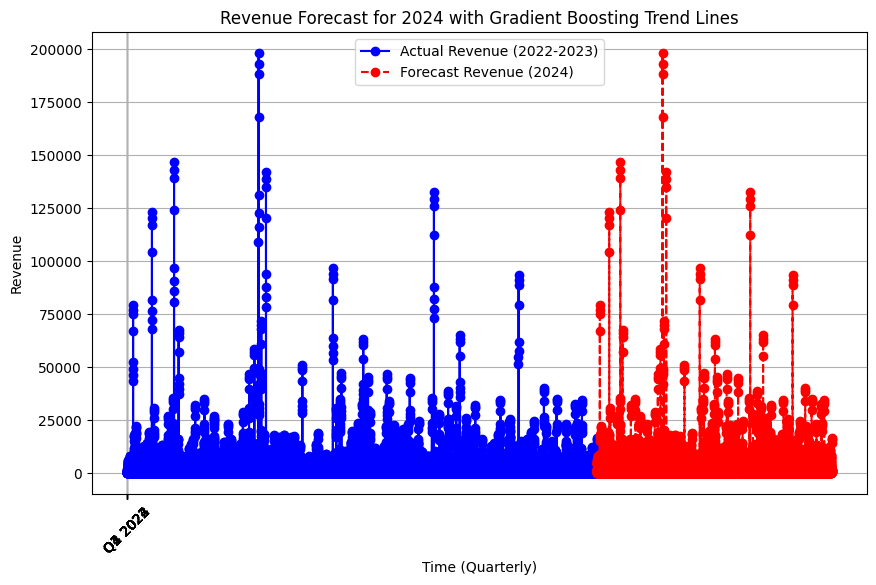

In [ ]:
# Plot the trend line for actual revenue (2022 and 2023)
plt.figure(figsize=(10, 6))
x_actual = np.arange(len(actual_values_2022_2023))  # Use the length of actual values for x-axis
plt.plot(x_actual, actual_values_2022_2023, label='Actual Revenue (2022-2023)', color='blue', marker='o')

# Plot the trend line for forecasted revenue (2024)
x_forecast = np.arange(len(actual_values_2022_2023), len(actual_values_2022_2023) + len(forecast_values_2024))  # Continue from the end of actual values
plt.plot(x_forecast, forecast_values_2024, label='Forecast Revenue (2024)', color='red', marker='o', linestyle='--')

# Customize the plot
plt.xticks(ticks=np.arange(len(time_labels)), labels=time_labels, rotation=45)  # Use the length of time labels for ticks
plt.title('Revenue Forecast for 2024 with Gradient Boosting Trend Lines')
plt.xlabel('Time (Quarterly)')
plt.ylabel('Revenue')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()

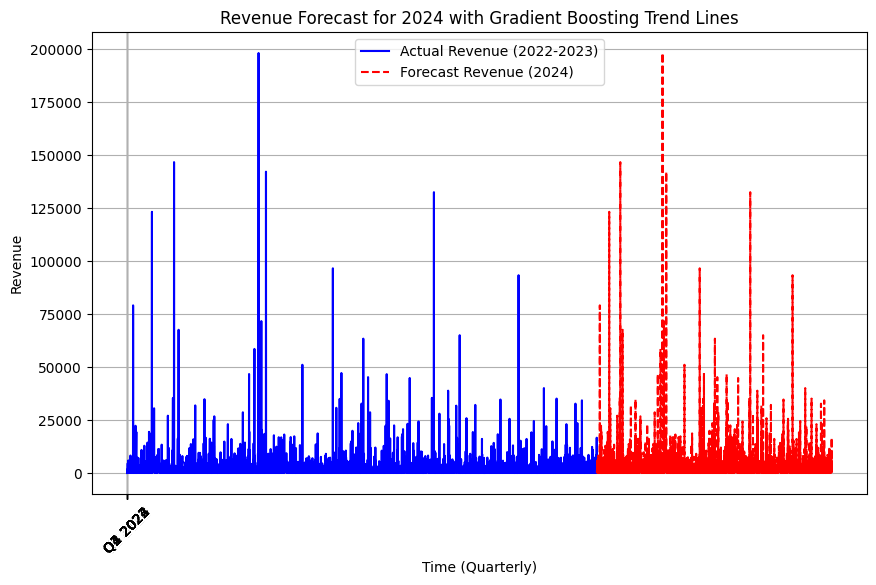

In [ ]:
# Plot the trend line for actual revenue (2022 and 2023)
plt.figure(figsize=(10, 6))

# Create x-axis values for actual and forecasted revenue
x_actual = np.arange(len(actual_values_2022_2023))  # Use the length of actual values for x-axis
x_forecast = np.arange(len(actual_values_2022_2023), len(actual_values_2022_2023) + len(forecast_values_2024))  # Continue from the end of actual values

# Plot the trend line for actual revenue (2022-2023)
plt.plot(x_actual, actual_values_2022_2023, label='Actual Revenue (2022-2023)', color='blue', linestyle='-')

# Plot the trend line for forecasted revenue (2024)
plt.plot(x_forecast, forecast_values_2024, label='Forecast Revenue (2024)', color='red', linestyle='--')

# Customize the plot
plt.xticks(ticks=np.arange(len(time_labels)), labels=time_labels, rotation=45)  # Use the length of time labels for ticks
plt.title('Revenue Forecast for 2024 with Gradient Boosting Trend Lines')
plt.xlabel('Time (Quarterly)')
plt.ylabel('Revenue')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()

In [ ]:
# Step 10: Add Business name to Forecasted Revnue for 2024 and Actual Spend Data for 2023 as well

Revenue Forecast using ARIMA

In [ ]:
pip install statsmodels

In [ ]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [ ]:
# Load the data (replace 'telecom_survey_data.csv' with your actual file name)
data = pd.read_csv('/content/telecom_survey_data_quarterly_2021_23.csv')

In [ ]:
# Step 2: Prepare data
# Use quarterly revenues from 2022 and 2023 to forecast 2024
features_arima = [
    'Q1_REV_AMT_2022', 'Q2_REV_AMT_2022', 'Q3_REV_AMT_2022', 'Q4_REV_AMT_2022',
    'Q1_REV_AMT_2023', 'Q2_REV_AMT_2023', 'Q3_REV_AMT_2023', 'Q4_REV_AMT_2023'
]
features_data = data[features_arima].mean(axis=0)

In [ ]:
print(features_data)

Q1_REV_AMT_2022    1378.360811
Q2_REV_AMT_2022    1463.175874
Q3_REV_AMT_2022    1548.004316
Q4_REV_AMT_2022    1654.021364
Q1_REV_AMT_2023    2120.543159
Q2_REV_AMT_2023    2375.018990
Q3_REV_AMT_2023    2438.637031
Q4_REV_AMT_2023    2502.250971
dtype: float64


In [ ]:
# Step 3: Prepare the data for ARIMA
# We'll use actual quarterly revenue from 2022 and 2023 for building the model and forecasting
actual_revenue = data[['Q1_REV_AMT_2022', 'Q2_REV_AMT_2022', 'Q3_REV_AMT_2022', 'Q4_REV_AMT_2022',
                       'Q1_REV_AMT_2023', 'Q2_REV_AMT_2023', 'Q3_REV_AMT_2023', 'Q4_REV_AMT_2023']].mean(axis=0)

In [ ]:
# Step 4: Train the ARIMA model
# Define the ARIMA model parameters (p, d, q)
model = ARIMA(actual_revenue, order=(1, 1, 1))  # Example: p=1, d=1, q=1

# Fit the model
arima_result = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a 

In [ ]:
# Step 5: Forecast future values (forecasting for 4 quarters in 2024)
forecast_steps = 4
forecast = arima_result.forecast(steps=forecast_steps)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [ ]:
# Step 6: Prepare evaluation
# We'll forecast the values for Q1-Q4 of 2024 using ARIMA and compare with expected values if available
# Since we don't have actual 2024 data, we'll just evaluate using the fitted model

# Here we're just using the model's fitted values for evaluation purposes (fitting it to the training data)
fitted_values = arima_result.fittedvalues

In [ ]:
# Step 7: Evaluation function
def evaluate_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    mape = mean_absolute_percentage_error(y_true, y_pred)

    print(f"Mean Squared Error (MSE): {mse}")
    print(f"R-Squared (R²): {r2}")
    print(f"Mean Absolute Percentage Error (MAPE): {mape * 100}%")
    print('-' * 50)

In [ ]:
# Evaluate the ARIMA model on the actual values from 2022 and 2023
evaluate_model(actual_revenue, fitted_values)

Mean Squared Error (MSE): 259698.44425393062
R-Squared (R²): -0.3278317051014008
Mean Absolute Percentage Error (MAPE): 16.786996842720377%
--------------------------------------------------


Mean Squared Error (MSE): 259,698.44, which is quite high, suggesting that the model's predictions have a significant amount of error.

R-Squared (R²): -0.33, indicating that the model is performing worse than a simple average (horizontal line), meaning it does not explain the variance in the data well.

Mean Absolute Percentage Error (MAPE): 16.79%, showing that, on average, the model's predictions deviate by 16.79% from the actual values.

In [ ]:
# Combine actual and forecasted revenue for plotting
combined_revenue = np.concatenate((actual_revenue, forecast))

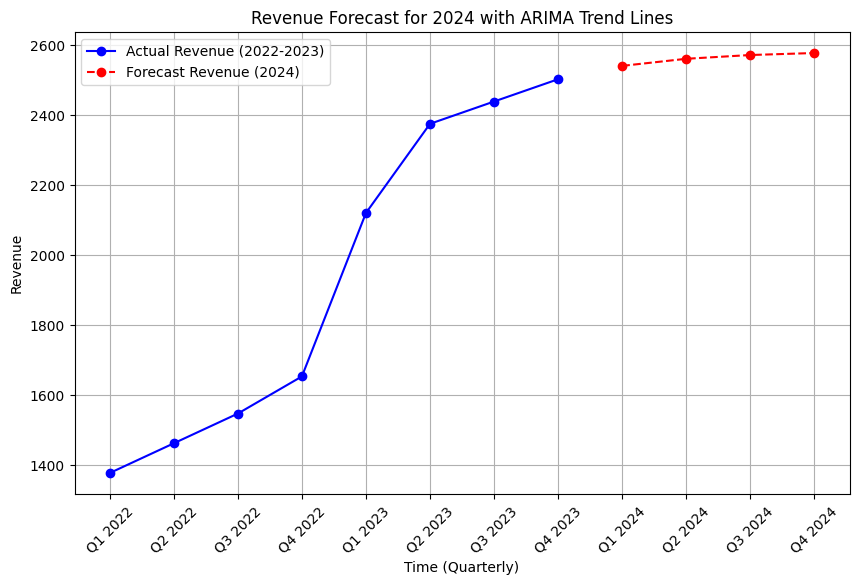

In [ ]:
# Prepare x-axis labels for plotting
time_labels = ['Q1 2022', 'Q2 2022', 'Q3 2022', 'Q4 2022', 'Q1 2023', 'Q2 2023', 'Q3 2023', 'Q4 2023',
               'Q1 2024', 'Q2 2024', 'Q3 2024', 'Q4 2024']

# Plot the actual and forecasted values
plt.figure(figsize=(10, 6))
x_actual = np.arange(len(actual_revenue))  # X-axis for actual values (2022-2023)
plt.plot(x_actual, actual_revenue, label='Actual Revenue (2022-2023)', color='blue', linestyle='-', marker='o')

# X-axis for forecasted values (2024)
x_forecast = np.arange(len(actual_revenue), len(combined_revenue))  # Continue from the end of actual values
plt.plot(x_forecast, forecast, label='Forecast Revenue (2024)', color='red', linestyle='--', marker='o')

# Customize the plot
plt.xticks(ticks=np.arange(len(time_labels)), labels=time_labels, rotation=45)
plt.title('Revenue Forecast for 2024 with ARIMA Trend Lines')
plt.xlabel('Time (Quarterly)')
plt.ylabel('Revenue')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()

In [ ]:
# Step 10: Add Business name to Forecasted Revnue for 2024 and Actual Spend Data for 2023 aswell

Revenue Forecast using SARIMA

In [ ]:
# Importing the required libraries for SARIMA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

In [ ]:
# Load the data (replace 'telecom_survey_data.csv' with your actual file name)
data = pd.read_csv('/content/telecom_survey_data_quarterly_2021_23.csv')

In [ ]:
# Step 2: Prepare data
# Use quarterly revenues from 2022 and 2023 to forecast 2024
features_sarima = [
    'Q1_REV_AMT_2022', 'Q2_REV_AMT_2022', 'Q3_REV_AMT_2022', 'Q4_REV_AMT_2022',
    'Q1_REV_AMT_2023', 'Q2_REV_AMT_2023', 'Q3_REV_AMT_2023', 'Q4_REV_AMT_2023'
]
features_data = data[features_sarima].mean(axis=0)

In [ ]:
print(features_data)

Q1_REV_AMT_2022    1378.360811
Q2_REV_AMT_2022    1463.175874
Q3_REV_AMT_2022    1548.004316
Q4_REV_AMT_2022    1654.021364
Q1_REV_AMT_2023    2120.543159
Q2_REV_AMT_2023    2375.018990
Q3_REV_AMT_2023    2438.637031
Q4_REV_AMT_2023    2502.250971
dtype: float64


In [ ]:
# Step 4: Train the SARIMA model
# Define the SARIMA model parameters (p, d, q) for non-seasonal part and (P, D, Q, m) for seasonal part
sarima_model = SARIMAX(actual_revenue, order=(1, 1, 1), seasonal_order=(1, 1, 1, 4))

# Fit the model
sarima_result = sarima_model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a 

In [ ]:
# Step 5: Forecast future values (forecasting for 4 quarters in 2024)
forecast_steps = 4  # Forecast for the next 4 quarters (2024)
forecast = sarima_result.forecast(steps=forecast_steps)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [ ]:
# Step 6: Prepare evaluation
# We'll evaluate the SARIMA model's fitted values using the actual revenue data from 2022 and 2023
fitted_values = sarima_result.fittedvalues

In [ ]:
# Step 7: Evaluation function
def evaluate_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    mape = mean_absolute_percentage_error(y_true, y_pred)

    print(f"Mean Squared Error (MSE): {mse}")
    print(f"R-Squared (R²): {r2}")
    print(f"Mean Absolute Percentage Error (MAPE): {mape * 100}%")
    print('-' * 50)

In [ ]:
# Evaluate the SARIMA model on the actual values from 2022 and 2023
evaluate_model(actual_revenue, fitted_values)

Mean Squared Error (MSE): 250739.3862011442
R-Squared (R²): -0.2820242634568837
Mean Absolute Percentage Error (MAPE): 17.374529399053245%
--------------------------------------------------


In [ ]:
# Step 8: Visualization with Line Trend Chart

# Combine actual and forecasted revenue for plotting
combined_revenue = np.concatenate((actual_revenue, forecast))

# Prepare x-axis labels for plotting
time_labels = ['Q1 2022', 'Q2 2022', 'Q3 2022', 'Q4 2022', 'Q1 2023', 'Q2 2023', 'Q3 2023', 'Q4 2023',
               'Q1 2024', 'Q2 2024', 'Q3 2024', 'Q4 2024']

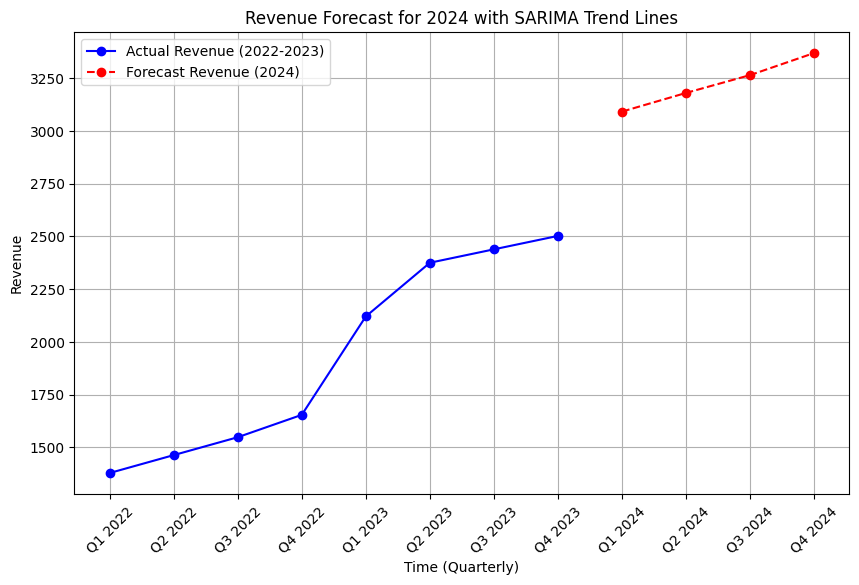

In [ ]:
# Plot the actual and forecasted values
plt.figure(figsize=(10, 6))
x_actual = np.arange(len(actual_revenue))  # X-axis for actual values (2022-2023)
plt.plot(x_actual, actual_revenue, label='Actual Revenue (2022-2023)', color='blue', linestyle='-', marker='o')

# X-axis for forecasted values (2024)
x_forecast = np.arange(len(actual_revenue), len(combined_revenue))  # Continue from the end of actual values
plt.plot(x_forecast, forecast, label='Forecast Revenue (2024)', color='red', linestyle='--', marker='o')

# Customize the plot
plt.xticks(ticks=np.arange(len(time_labels)), labels=time_labels, rotation=45)
plt.title('Revenue Forecast for 2024 with SARIMA Trend Lines')
plt.xlabel('Time (Quarterly)')
plt.ylabel('Revenue')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()

In [ ]:
# Step 10: Add Business name to Forecasted Revnue for 2024 and Actual Spend Data for 2023 aswell

SARIMA - QUARTERLY REVENUE FORECAST (2024 and 2025)

In [ ]:
# Load Key Libraries
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

In [ ]:
# Load your dataset
data = pd.read_csv('/content/telecom_business_profile_quarterly_sales_revenue_data.csv')
print (data.head(5))
# Select revenue columns and reshape them into a single time series
revenue_columns = [
    'REV_AMT_2021Q1', 'REV_AMT_2021Q2', 'REV_AMT_2021Q3', 'REV_AMT_2021Q4',
    'REV_AMT_2022Q1', 'REV_AMT_2022Q2', 'REV_AMT_2022Q3', 'REV_AMT_2022Q4',
    'REV_AMT_2023Q1', 'REV_AMT_2023Q2', 'REV_AMT_2023Q3', 'REV_AMT_2023Q4'
]

                             BUSINESS_NAME             LINE_OF_BUSINESS  \
0                        Travel Guide, LLC         Advertising services   
1           Rock Creek Veterinary Hospital          Veterinary services   
2           Colorado Free University, Inc.           College/university   
3   Griffin's Dry Cleaning & Laundry, Inc.            Drycleaning plant   
4  RG Bank, A Savings and Loan Association  Federal savings institution   

          CITY STATE_CD  EMPLOYEES_HERE  EMPLOYEES_TOTAL  SALES_VOLUME_2023Q1  \
0     Maitland       FL              63               63            183331.84   
1   Broomfield       CO               7                7             18671.76   
2       Denver       CO               7                7             56119.96   
3      Sebring       FL              10               20             36091.76   
4  Monte Vista       CO               5               30            221560.00   

   SALES_VOLUME_2023Q2  SALES_VOLUME_2023Q3  SALES_VOLUME_2023

In [ ]:
# Ensure the business name exists, try printing unique values
print(data['BUSINESS_NAME'].unique())

# Replace 'Your Business Name' with an actual business name from your dataset
business_data = data[data['BUSINESS_NAME'] == 'Business Name Here'][revenue_columns].T # Make sure 'Business Name Here' is an actual business name

# Check if the DataFrame is empty after filtering
if business_data.empty:
  print("No data found for this business. Please check the business name and revenue columns.")
else:
  # Convert into a proper time-series format
  business_data.columns = ['Revenue']
  business_data.index = pd.date_range(start='2021Q1', periods=len(revenue_columns), freq='Q')

['Travel Guide, LLC' 'Rock Creek Veterinary Hospital'
 'Colorado Free University, Inc.' ... 'Conexsmart LLC'
 'S and K Barbour Contracting LLC' 'Compass Rose Restaurant & Bar, Inc.']
No data found for this business. Please check the business name and revenue columns.


In [ ]:
# Ensure the business name exists, try printing unique values
print(data['BUSINESS_NAME'].unique())

# Replace 'Your Business Name' with an actual business name from your dataset
business_data = data[data['BUSINESS_NAME'] == 'A Business Name From The List Printed Above'][revenue_columns].T

# Check if the DataFrame is empty after filtering
if business_data.empty:
  print("No data found for this business. Please check the business name and revenue columns.")
else:
  # Convert into a proper time-series format
  business_data.columns = ['Revenue']
  business_data.index = pd.date_range(start='2021Q1', periods=len(revenue_columns), freq='Q')

  #Fit SARIMA model
  !pip install statsmodels
  import statsmodels.api as sm
  from statsmodels.tsa.statespace.sarimax import SARIMAX

  model = SARIMAX(business_data['Revenue'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 4))
  sarima_result = model.fit()

['Travel Guide, LLC' 'Rock Creek Veterinary Hospital'
 'Colorado Free University, Inc.' ... 'Conexsmart LLC'
 'S and K Barbour Contracting LLC' 'Compass Rose Restaurant & Bar, Inc.']
No data found for this business. Please check the business name and revenue columns.


In [ ]:
# Forecast for 8 quarters (2024-2025)
forecast_steps = 8
forecast = sarima_result.get_forecast(steps=forecast_steps)
forecast_index = pd.date_range(start='2024Q1', periods=forecast_steps, freq='Q')
forecast_df = pd.DataFrame(forecast.predicted_mean, index=forecast_index, columns=['Forecasted_Revenue'])

NameError: name 'sarima_result' is not defined

In [ ]:
# Ensure the business name exists, try printing unique values
print(data['BUSINESS_NAME'].unique())

# Replace 'Your Business Name' with an actual business name from your dataset
business_data = data[data['BUSINESS_NAME'] == 'A Business Name From The List Printed Above'][revenue_columns].T

# Check if the DataFrame is empty after filtering
if business_data.empty:
  print("No data found for this business. Please check the business name and revenue columns.")
else:
  # Convert into a proper time-series format
  business_data.columns = ['Revenue']
  business_data.index = pd.date_range(start='2021Q1', periods=len(revenue_columns), freq='Q')

  #Fit SARIMA model
  !pip install statsmodels
  import statsmodels.api as sm
  from statsmodels.tsa.statespace.sarimax import SARIMAX

  model = SARIMAX(business_data['Revenue'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 4))
  sarima_result = model.fit()

  # Forecast for 8 quarters (2024-2025) #This block of code is now inside the else block.
  forecast_steps = 8
  forecast = sarima_result.get_forecast(steps=forecast_steps) # sarima_result is now defined and can be used
  forecast_index = pd.date_range(start='2024Q1', periods=forecast_steps, freq='Q')
  forecast_df = pd.DataFrame(forecast.predicted_mean, index=forecast_index, columns=['Forecasted_Revenue'])

['Travel Guide, LLC' 'Rock Creek Veterinary Hospital'
 'Colorado Free University, Inc.' ... 'Conexsmart LLC'
 'S and K Barbour Contracting LLC' 'Compass Rose Restaurant & Bar, Inc.']
No data found for this business. Please check the business name and revenue columns.


In [ ]:
# Combine actual and forecasted data
combined_data = pd.concat([business_data, forecast_df])

# Plot actual vs forecasted revenue
plt.figure(figsize=(10, 6))
plt.plot(combined_data.index, combined_data['Revenue'], label='Actual Revenue (2021-2023)', marker='o', color='blue')
plt.plot(forecast_df.index, forecast_df['Forecasted_Revenue'], label='Forecasted Revenue (2024-2025)', marker='o', linestyle='--', color='red')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.title('Revenue Forecast for 2024 and 2025 (SARIMA)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Print forecasted values for 2024 and 2025
print(forecast_df)

KeyError: 'Revenue'

<Figure size 1000x600 with 0 Axes>

In [ ]:
# Combine actual and forecasted data
combined_data = pd.concat([business_data, forecast_df])

# Rename columns for consistency
combined_data = combined_data.rename(columns={'Revenue': 'Actual_Revenue', 'Forecasted_Revenue': 'Forecasted_Revenue'})

# Plot actual vs forecasted revenue
plt.figure(figsize=(10, 6))
# Use 'Actual_Revenue' because that is what the column was renamed to.
plt.plot(combined_data.index, combined_data['Actual_Revenue'], label='Actual Revenue (2021-2023)', marker='o', color='blue')
plt.plot(forecast_df.index, forecast_df['Forecasted_Revenue'], label='Forecasted Revenue (2024-2025)', marker='o', linestyle='--', color='red')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.title('Revenue Forecast for 2024 and 2025 (SARIMA)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Print forecasted values for 2024 and 2025
print(forecast_df)

KeyError: 'Actual_Revenue'

<Figure size 1000x600 with 0 Axes>

KeyError: 'Revenue'

<Figure size 1000x600 with 0 Axes>

Revenue Forecast Using PROPHET Model - 2024

In [ ]:
# Install the required package for PROPHET Model if not already installed
!pip install prophet

In [ ]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet
from sklearn.metrics import mean_squared_error

In [ ]:
# Load the data (replace 'telecom_survey_data.csv' with your actual file name)
data = pd.read_csv('/content/telecom_survey_data_quarterly_2021_23.csv')

In [ ]:
# EDA: Selecting the relevant revenue columns
revenue_columns_prop = ['Q1_REV_AMT_2022', 'Q2_REV_AMT_2022', 'Q3_REV_AMT_2022', 'Q4_REV_AMT_2022',
                   'Q1_REV_AMT_2023', 'Q2_REV_AMT_2023', 'Q3_REV_AMT_2023', 'Q4_REV_AMT_2023']

In [ ]:
# Creating a time series of quarterly revenue data
revenue_data = data[revenue_columns_prop].mean(axis=0)

# Converting to a time series with quarterly index
revenue_data.index = pd.date_range(start='2022Q1', periods=len(revenue_data), freq='Q')

<ipython-input-162-7d73918147a8>:5: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  revenue_data.index = pd.date_range(start='2022Q1', periods=len(revenue_data), freq='Q')


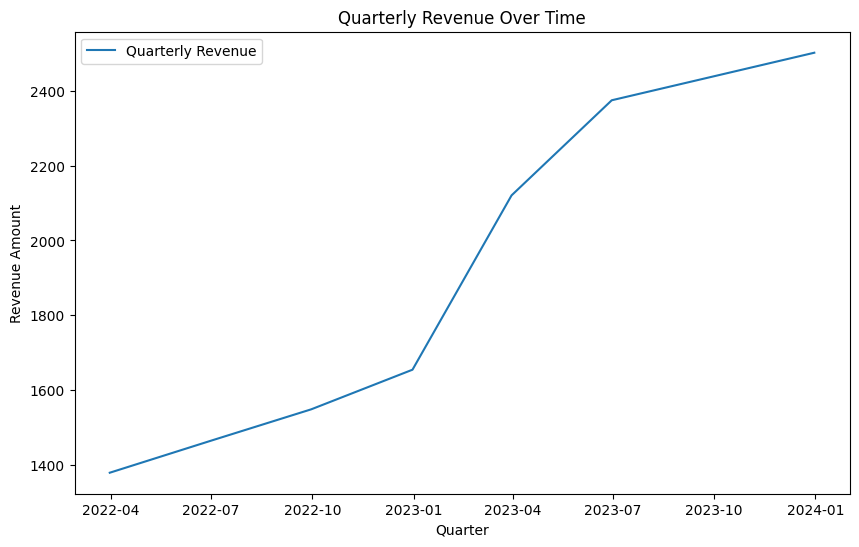

In [ ]:
# Plot the quarterly revenue data
plt.figure(figsize=(10, 6))
plt.plot(revenue_data, label='Quarterly Revenue')
plt.title('Quarterly Revenue Over Time')
plt.xlabel('Quarter')
plt.ylabel('Revenue Amount')
plt.legend()
plt.show()

In [ ]:
# prompt: prepare the data for the  prophet

# Prepare the data for Prophet
df_prophet = pd.DataFrame({'ds': revenue_data.index, 'y': revenue_data.values})

# Train the Prophet model
prophet_model = Prophet(seasonality_mode='multiplicative', yearly_seasonality=True)
prophet_model.fit(df_prophet)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 5.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpiwddbck1/pffvoru9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpiwddbck1/vbajpyiv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=60476', 'data', 'file=/tmp/tmpiwddbck1/pffvoru9.json', 'init=/tmp/tmpiwddbck1/vbajpyiv.json', 'output', 'file=/tmp/tmpiwddbck1/prophet_modeljxgbdlwv/prophet_model-20241002095848.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
09:58:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:58:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:c

In [ ]:
# Forecasting for 2024 (next 4 quarters)
future = prophet_model.make_future_dataframe(periods=4, freq='Q')  # Next 4 quarters
forecast = prophet_model.predict(future)

/usr/local/lib/python3.10/dist-packages/prophet/forecaster.py:1854: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  dates = pd.date_range(


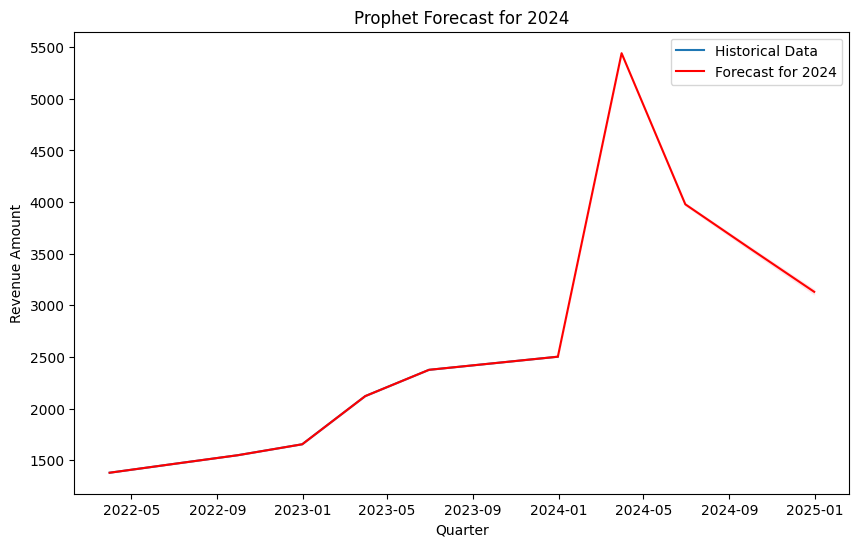

In [ ]:
# prompt: plot the forecast

# Plotting the forecast
plt.figure(figsize=(10, 6))
plt.plot(df_prophet['ds'], df_prophet['y'], label='Historical Data')
plt.plot(forecast['ds'], forecast['yhat'], label='Forecast for 2024', color='red')
plt.fill_between(forecast['ds'].values, forecast['yhat_lower'].values, forecast['yhat_upper'].values, color='pink', alpha=0.3)
plt.title('Prophet Forecast for 2024')
plt.xlabel('Quarter')
plt.ylabel('Revenue Amount')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


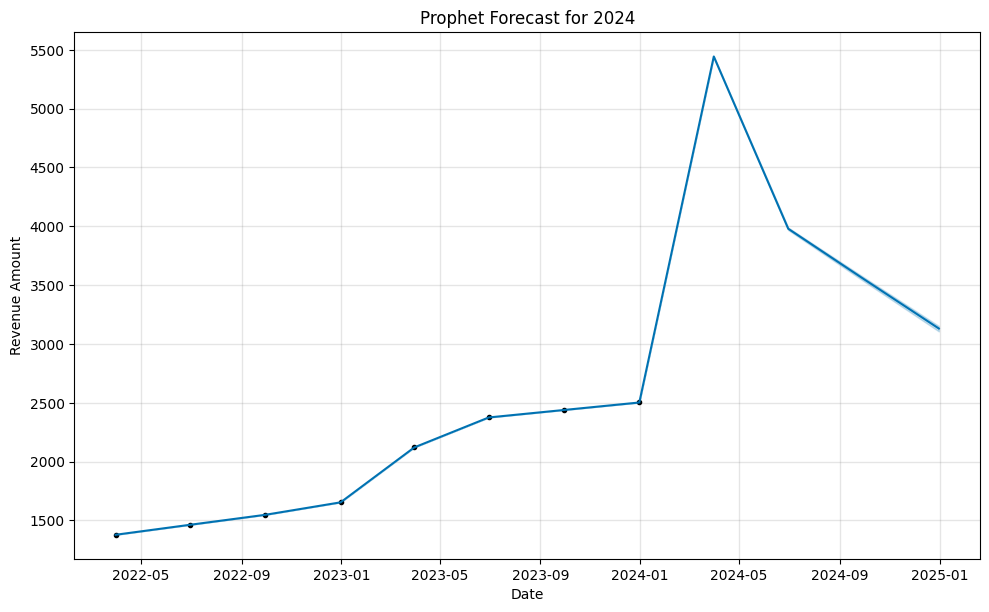

In [ ]:
# Plotting the forecast
fig = prophet_model.plot(forecast)
plt.title('Prophet Forecast for 2024')
plt.xlabel('Date')
plt.ylabel('Revenue Amount')
plt.show()

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` o

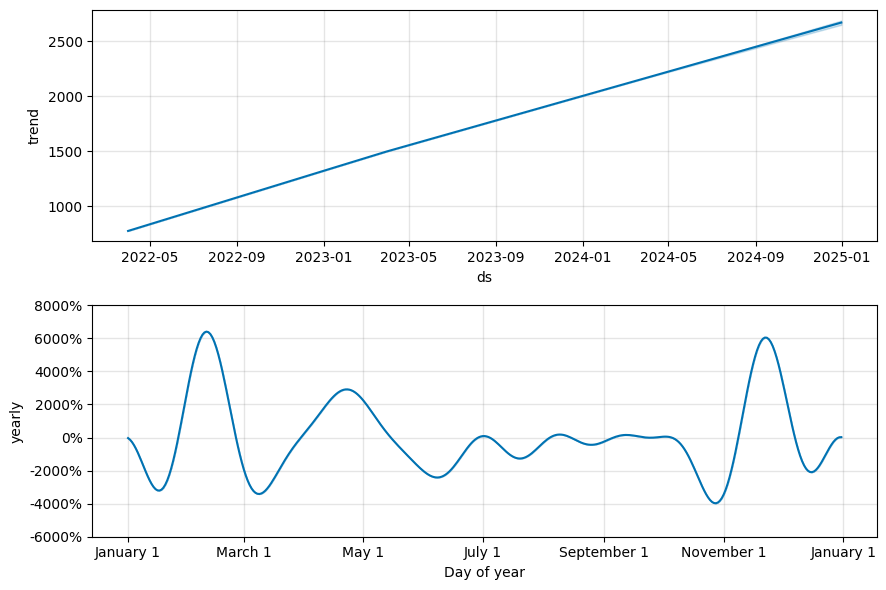

In [ ]:
# Plotting the forecast components (trend, yearly seasonality)
fig2 = prophet_model.plot_components(forecast)
plt.show()

In [ ]:
# prompt: evaluate the model on MSE,MAPE,R2

# Assuming you have actual values for the last few quarters for testing
# Replace this with your actual test data
test_data = revenue_data[-4:]  # Last 4 quarters for testing
# Get the predicted values for the test data
predictions = forecast['yhat'][-4:]

# Calculate MSE
mse = mean_squared_error(test_data, predictions)
print(f"MSE: {mse}")

# Calculate MAPE
mape = mean_absolute_percentage_error(test_data, predictions)
print(f"MAPE: {mape}")

# Calculate R-squared
r2 = r2_score(test_data, predictions)
print(f"R-squared: {r2}")

MSE: 3809310.908850695
MAPE: 0.7373042290962146
R-squared: -180.43653834928136


In [ ]:
# Step 10: Add Business name to Forecasted Revnue for 2024 and Actual Spend Data for 2023 aswell

Linear Regression - Forecast for Year 2023

In [ ]:
# Step 1: Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Linear Regression
# Load the data (replace 'telecom_survey_data.csv' with your actual file name)
data = pd.read_csv('/content/telecom_survey_data_quarterly_2021_23.csv')

# Step 2: Prepare data
# Use quarterly revenues from 2022 and 2023 to forecast 2024
features_lr = [
    'Q1_REV_AMT_2021', 'Q2_REV_AMT_2021', 'Q3_REV_AMT_2021', 'Q4_REV_AMT_2021',
    'Q1_REV_AMT_2022', 'Q2_REV_AMT_2022', 'Q3_REV_AMT_2022', 'Q4_REV_AMT_2022'
]
features_data = data[features_lr].mean(axis=0)

# Print Value
print(features_data)

Q1_REV_AMT_2021     848.224860
Q2_REV_AMT_2021     975.450798
Q3_REV_AMT_2021    1081.487052
Q4_REV_AMT_2021    1229.918429
Q1_REV_AMT_2022    1378.360811
Q2_REV_AMT_2022    1463.175874
Q3_REV_AMT_2022    1548.004316
Q4_REV_AMT_2022    1654.021364
dtype: float64


In [ ]:
# Step 3: Import necessary libraries for building model & evaluation
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.linear_model import LinearRegression

In [ ]:
# Step 4: Prepare data
# Assuming features_lr is already defined and contains the appropriate columns
X = data[features_lr]

# For simplicity, using 2022 as a proxy for the target (since 2023 data isn't available)
y_Q1 = data['Q1_REV_AMT_2022']
y_Q2 = data['Q2_REV_AMT_2022']
y_Q3 = data['Q3_REV_AMT_2022']
y_Q4 = data['Q4_REV_AMT_2022']

In [ ]:
# Step 5: Forecasting for all four quarters in 2024
# Initialize the Linear Regression model
model = LinearRegression()

In [ ]:
# Step 6: Train and Predict
# Forecast for Q1 2023
model.fit(X, y_Q1)  # Training on 2022 data to predict 2023 (assumed scenario)
y_pred_Q1 = model.predict(X)

# Forecast for Q2 2024
model.fit(X, y_Q2)
y_pred_Q2 = model.predict(X)

# Forecast for Q3 2024
model.fit(X, y_Q3)
y_pred_Q3 = model.predict(X)

# Forecast for Q4 2024
model.fit(X, y_Q4)
y_pred_Q4 = model.predict(X)

In [ ]:
# Step 7: Evaluation Function
def evaluate_model(y_true, y_pred, quarter):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    mape = mean_absolute_percentage_error(y_true, y_pred)

    print(f"Evaluation for {quarter}:")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"R-Squared (R²): {r2}")
    print(f"Mean Absolute Percentage Error (MAPE): {mape * 100}%")
    print('-' * 50)

In [ ]:
# Step 8: Evaluate for each quarter
evaluate_model(y_Q1, y_pred_Q1, 'Q1 2023')
evaluate_model(y_Q2, y_pred_Q2, 'Q2 2023')
evaluate_model(y_Q3, y_pred_Q3, 'Q3 2023')
evaluate_model(y_Q4, y_pred_Q4, 'Q4 2023')

Evaluation for Q1 2023:
Mean Squared Error (MSE): 1.6261820059736552e-25
R-Squared (R²): 1.0
Mean Absolute Percentage Error (MAPE): 0.06743634009495672%
--------------------------------------------------
Evaluation for Q2 2023:
Mean Squared Error (MSE): 2.0605867074798384e-24
R-Squared (R²): 1.0
Mean Absolute Percentage Error (MAPE): 883.9015968925341%
--------------------------------------------------
Evaluation for Q3 2023:
Mean Squared Error (MSE): 9.22702260693002e-24
R-Squared (R²): 1.0
Mean Absolute Percentage Error (MAPE): 1767.803193785068%
--------------------------------------------------
Evaluation for Q4 2023:
Mean Squared Error (MSE): 6.258022528620196e-25
R-Squared (R²): 1.0
Mean Absolute Percentage Error (MAPE): 441.950798446267%
--------------------------------------------------


In [ ]:
# Step 9: Combine results into a dataframe for easy handling and visualization
forecast_df = pd.DataFrame({
    'Q1_2021': data['Q1_REV_AMT_2021'],
    'Q2_2021': data['Q2_REV_AMT_2021'],
    'Q3_2021': data['Q3_REV_AMT_2021'],
    'Q4_2021': data['Q4_REV_AMT_2021'],
    'Q1_2022': data['Q1_REV_AMT_2022'],
    'Q2_2022': data['Q2_REV_AMT_2022'],
    'Q3_2022': data['Q3_REV_AMT_2022'],
    'Q4_2022': data['Q4_REV_AMT_2022'],
    'Forecast_Q1_2023': y_pred_Q1,
    'Forecast_Q2_2023': y_pred_Q2,
    'Forecast_Q3_2023': y_pred_Q3,
    'Forecast_Q4_2023': y_pred_Q4
})

In [ ]:
# Visualization with Trend Lines
# Prepare time data points for the x-axis
quarters = ['Q1', 'Q2', 'Q3', 'Q4']
years = ['2021', '2022', '2023']

In [ ]:
# Create x-axis labels combining years and quarters
time_labels = [f"{q} {y}" for y in years for q in quarters]

# Flatten the data for plotting trend lines
actual_values_2021_2022 = forecast_df[['Q1_2021', 'Q2_2021', 'Q3_2021', 'Q4_2021',
                                       'Q1_2022', 'Q2_2022', 'Q3_2022', 'Q4_2022']].mean().values

forecast_values_2023 = forecast_df[['Forecast_Q1_2023', 'Forecast_Q2_2023', 'Forecast_Q3_2023', 'Forecast_Q4_2023']].mean().values

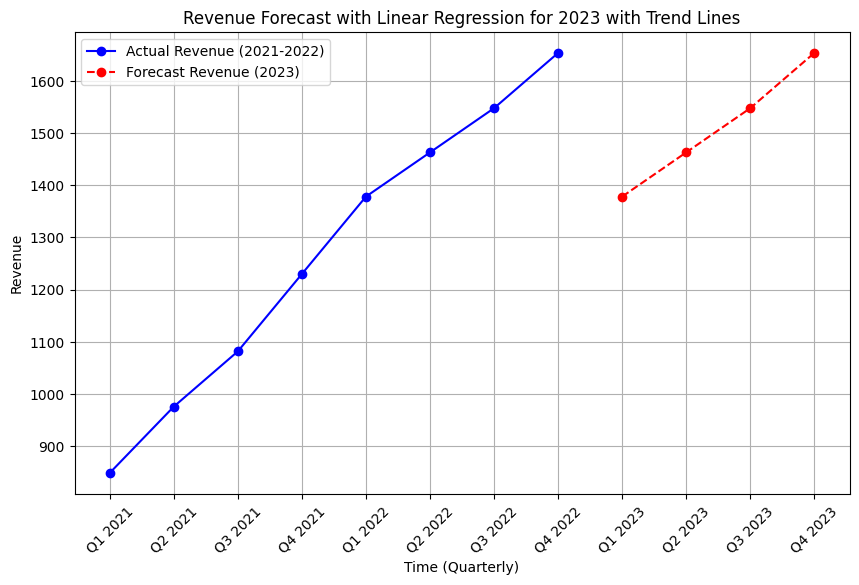

In [ ]:
# Plot the trend line for actual revenue (2021 and 2022)
#!pip install matplotlib
import matplotlib.pyplot as plt
import numpy as np #Added this line to import the numpy module and alias it as np

plt.figure(figsize=(10, 6))
x_actual = np.arange(1, 9)  # 8 points for 2021 and 2022
plt.plot(x_actual, actual_values_2021_2022, label='Actual Revenue (2021-2022)', color='blue', marker='o')

# Plot the trend line for forecasted revenue (2023)
x_forecast = np.arange(9, 13)  # 4 points for 2023
plt.plot(x_forecast, forecast_values_2023, label='Forecast Revenue (2023)', color='red', marker='o', linestyle='--')

# Customize the plot
plt.xticks(ticks=np.arange(1, 13), labels=time_labels, rotation=45)
plt.title('Revenue Forecast with Linear Regression for 2023 with Trend Lines')
plt.xlabel('Time (Quarterly)')
plt.ylabel('Revenue')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()

In [ ]:
#Calculate Top 20 Business for Year 2023 based upon Forecasted Revenue

In [ ]:
# Add the Business_name field from your data
forecast_df['Business_name'] = data['BUSINESS_NAME']

# Calculate total forecasted revenue for 2023 by summing all quarters
forecast_df['Total_Forecasted_Revenue_2023'] = (
    forecast_df['Forecast_Q1_2023'] +
    forecast_df['Forecast_Q2_2023'] +
    forecast_df['Forecast_Q3_2023'] +
    forecast_df['Forecast_Q4_2023']
)

In [ ]:
# Step 4: Sort the DataFrame by Total_Forecasted_Revenue_2023 in descending order to get the top 50 businesses
top_20_businesses = forecast_df.sort_values(by='Total_Forecasted_Revenue_2023', ascending=False).head(20)

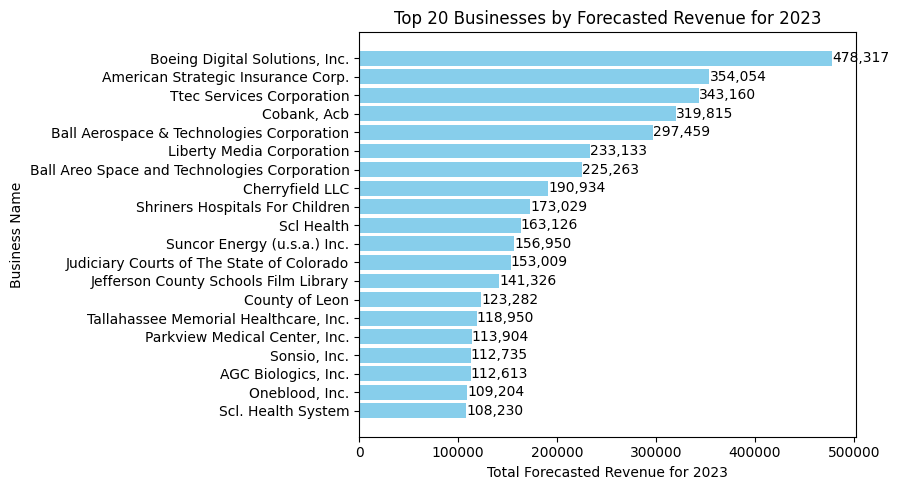

In [ ]:
#Visualize Top 20 Business having High Forecasted Revenue
plt.figure(figsize=(9, 5))

# Bar chart for top 20 businesses
# Check if 'Business Name' is present in the DataFrame, if not, use index instead
if 'Business_name' in top_20_businesses.columns:
    bars = plt.barh(top_20_businesses['Business_name'], top_20_businesses['Total_Forecasted_Revenue_2023'], color='skyblue')
else:
    bars = plt.barh(top_20_businesses.index, top_20_businesses['Total_Forecasted_Revenue_2022'], color='skyblue')

# Customize the plot
plt.xlabel('Total Forecasted Revenue for 2023')
plt.ylabel('Business Name')
plt.title('Top 20 Businesses by Forecasted Revenue for 2023')
plt.gca().invert_yaxis()  # To display the largest bar on top

# Display the value at the end of each bar
for bar in bars:
    plt.text(
        bar.get_width(),  # x-coordinate of the text
        bar.get_y() + bar.get_height() / 2,  # y-coordinate of the text (centered vertically)
        f'{bar.get_width():,.0f}',  # The actual value (formatted with commas for readability)
        va='center',  # Vertical alignment
        ha='left',  # Horizontal alignment
        fontsize=10  # Font size for the text
    )

# Display the plot
plt.tight_layout()
plt.show()

In [ ]:
# Random Forest - Forecast 2023
# Step 1: Import necessary libraries
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Load the data (replace 'telecom_survey_data.csv' with your actual file name)
data = pd.read_csv('/content/telecom_survey_data_quarterly_2021_23.csv')

# Step 2: Prepare data
# Use quarterly revenues from 2022 and 2023 to forecast 2024
features_rf = [
    'Q1_REV_AMT_2021', 'Q2_REV_AMT_2021', 'Q3_REV_AMT_2021', 'Q4_REV_AMT_2021',
    'Q1_REV_AMT_2022', 'Q2_REV_AMT_2022', 'Q3_REV_AMT_2022', 'Q4_REV_AMT_2022'
]
features_data = data[features_rf].mean(axis=0)

# Print Value
print(features_data)

Q1_REV_AMT_2021     848.224860
Q2_REV_AMT_2021     975.450798
Q3_REV_AMT_2021    1081.487052
Q4_REV_AMT_2021    1229.918429
Q1_REV_AMT_2022    1378.360811
Q2_REV_AMT_2022    1463.175874
Q3_REV_AMT_2022    1548.004316
Q4_REV_AMT_2022    1654.021364
dtype: float64


In [ ]:
# Step 3: Prepare data
# Assuming features_lr is already defined and contains the appropriate columns
X = data[features_rf]

# For simplicity, using 2022 as a proxy for the target (since 2023 data isn't available)
y_Q1 = data['Q1_REV_AMT_2022']
y_Q2 = data['Q2_REV_AMT_2022']
y_Q3 = data['Q3_REV_AMT_2022']
y_Q4 = data['Q4_REV_AMT_2022']

In [ ]:
# Step 4: Import necessary libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error

In [ ]:
# Step 5: Forecasting for all four quarters in 2023
# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

In [ ]:
# Step 6: Train and Predict for each quarter
# Forecast for Q1 2024
rf_model.fit(X, y_Q1)
y_pred_Q1 = rf_model.predict(X)

# Forecast for Q2 2024
rf_model.fit(X, y_Q2)
y_pred_Q2 = rf_model.predict(X)

# Forecast for Q3 2024
rf_model.fit(X, y_Q3)
y_pred_Q3 = rf_model.predict(X)

# Forecast for Q4 2024
rf_model.fit(X, y_Q4)
y_pred_Q4 = rf_model.predict(X)

In [ ]:
# Step 7: Evaluation Function
def evaluate_model(y_true, y_pred, quarter):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    mape = mean_absolute_percentage_error(y_true, y_pred)

    print(f"Evaluation for {quarter}:")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"R-Squared (R²): {r2}")
    print(f"Mean Absolute Percentage Error (MAPE): {mape * 100}%")
    print('-' * 50)

# Step 8: Evaluate for each quarter
evaluate_model(y_Q1, y_pred_Q1, 'Q1 2023')
evaluate_model(y_Q2, y_pred_Q2, 'Q2 2023')
evaluate_model(y_Q3, y_pred_Q3, 'Q3 2023')
evaluate_model(y_Q4, y_pred_Q4, 'Q4 2023')

Evaluation for Q1 2023:
Mean Squared Error (MSE): 32685.339384397957
R-Squared (R²): 0.997834554403454
Mean Absolute Percentage Error (MAPE): 19437201671862.37%
--------------------------------------------------
Evaluation for Q2 2023:
Mean Squared Error (MSE): 36832.316782434216
R-Squared (R²): 0.997834530287418
Mean Absolute Percentage Error (MAPE): 0.06057228573704543%
--------------------------------------------------
Evaluation for Q3 2023:
Mean Squared Error (MSE): 41225.71060707813
R-Squared (R²): 0.9978345832345852
Mean Absolute Percentage Error (MAPE): 0.05809831647353835%
--------------------------------------------------
Evaluation for Q4 2023:
Mean Squared Error (MSE): 47067.80744542514
R-Squared (R²): 0.9978345181534981
Mean Absolute Percentage Error (MAPE): 0.051937101075578064%
--------------------------------------------------


In [ ]:
# Step 9: Combine results into a dataframe for easy handling and visualization
forecast_df = pd.DataFrame({
    'Q1_2021': data['Q1_REV_AMT_2021'],
    'Q2_2021': data['Q2_REV_AMT_2021'],
    'Q3_2021': data['Q3_REV_AMT_2021'],
    'Q4_2021': data['Q4_REV_AMT_2021'],
    'Q1_2022': data['Q1_REV_AMT_2022'],
    'Q2_2022': data['Q2_REV_AMT_2022'],
    'Q3_2022': data['Q3_REV_AMT_2022'],
    'Q4_2022': data['Q4_REV_AMT_2022'],
    'Forecast_Q1_2023': y_pred_Q1,
    'Forecast_Q2_2023': y_pred_Q2,
    'Forecast_Q3_2023': y_pred_Q3,
    'Forecast_Q4_2023': y_pred_Q4
})

In [ ]:
# Create x-axis labels combining years and quarters
time_labels = [f"{q} {y}" for y in years for q in quarters]

# Flatten the data for plotting trend lines
actual_values_2021_2022 = forecast_df[['Q1_2021', 'Q2_2021', 'Q3_2021', 'Q4_2021',
                                       'Q1_2022', 'Q2_2022', 'Q3_2022', 'Q4_2022']].mean().values

forecast_values_2023 = forecast_df[['Forecast_Q1_2023', 'Forecast_Q2_2023', 'Forecast_Q3_2023', 'Forecast_Q4_2023']].mean().values

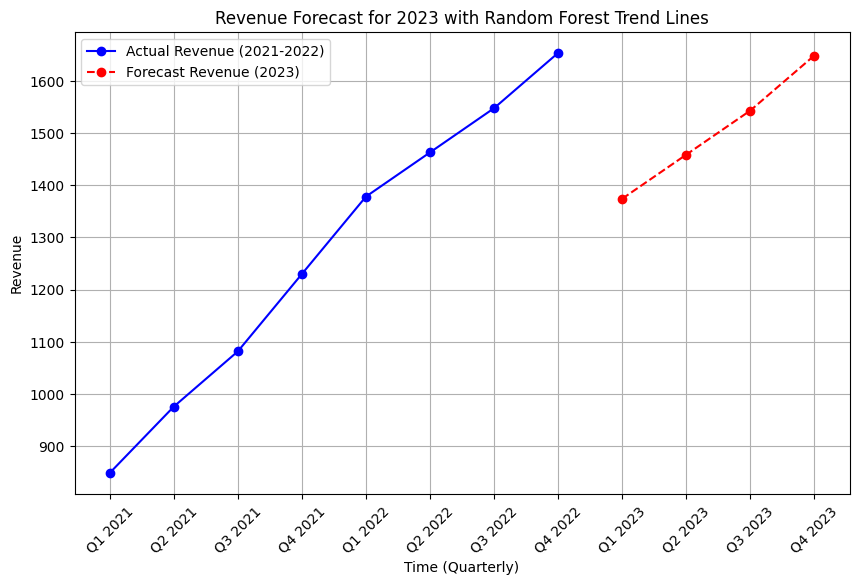

In [ ]:
# Plot the trend line for actual revenue (2022 and 2023)
#!pip install matplotlib
import matplotlib.pyplot as plt
import numpy as np
# Plot the trend line for actual revenue (2021 and 2022)
plt.figure(figsize=(10, 6))
x_actual = np.arange(1, 9)  # 8 points for 2022 and 2023

# Calculate the average revenue for each quarter across all entities
average_revenue = actual_values_2021_2022.reshape(-1, 8).mean(axis=0)

plt.plot(x_actual, average_revenue, label='Actual Revenue (2021-2022)', color='blue', marker='o')

# Plot the trend line for forecasted revenue (2023)
x_forecast = np.arange(9, 13)  # 4 points for 2023

# Calculate the average forecasted revenue for each quarter
average_forecast = forecast_values_2023.reshape(-1, 4).mean(axis=0)

plt.plot(x_forecast, average_forecast, label='Forecast Revenue (2023)', color='red', marker='o', linestyle='--')

# Customize the plot
plt.xticks(ticks=np.arange(1, 13), labels=time_labels, rotation=45)
plt.title('Revenue Forecast for 2023 with Random Forest Trend Lines')
plt.xlabel('Time (Quarterly)')
plt.ylabel('Revenue')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()

In [ ]:
# ARIMA Model - Forecast
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [ ]:
# Load the data (replace 'telecom_survey_data.csv' with your actual file name)
data = pd.read_csv('/content/telecom_survey_data_quarterly_2021_23.csv')

# Step 2: Prepare data
# Use quarterly revenues from 2021 and 2022 to forecast 2023
features_arima = [
    'Q1_REV_AMT_2021', 'Q2_REV_AMT_2021', 'Q3_REV_AMT_2021', 'Q4_REV_AMT_2021',
    'Q1_REV_AMT_2022', 'Q2_REV_AMT_2022', 'Q3_REV_AMT_2022', 'Q4_REV_AMT_2022'
]
features_data = data[features_arima].mean(axis=0)

# Print Value
print(features_data)

Q1_REV_AMT_2021     848.224860
Q2_REV_AMT_2021     975.450798
Q3_REV_AMT_2021    1081.487052
Q4_REV_AMT_2021    1229.918429
Q1_REV_AMT_2022    1378.360811
Q2_REV_AMT_2022    1463.175874
Q3_REV_AMT_2022    1548.004316
Q4_REV_AMT_2022    1654.021364
dtype: float64


In [ ]:
# Step 3: Prepare data
# Assuming features_arima is already defined and contains the appropriate columns
X = data[features_arima]

# For simplicity, using 2022 as a proxy for the target (since 2023 data isn't available)
y_Q1 = data['Q1_REV_AMT_2022']
y_Q2 = data['Q2_REV_AMT_2022']
y_Q3 = data['Q3_REV_AMT_2022']
y_Q4 = data['Q4_REV_AMT_2022']

In [ ]:
# Step 4: Prepare the data for ARIMA
# We'll use actual quarterly revenue from 2021 and 2022 for building the model and forecasting
actual_revenue = data[['Q1_REV_AMT_2021', 'Q2_REV_AMT_2021', 'Q3_REV_AMT_2021', 'Q4_REV_AMT_2021',
                       'Q1_REV_AMT_2022', 'Q2_REV_AMT_2022', 'Q3_REV_AMT_2022', 'Q4_REV_AMT_2022']].mean(axis=0)

In [ ]:
# Step 4: Train the ARIMA model
# Define the ARIMA model parameters (p, d, q)
model = ARIMA(actual_revenue, order=(1, 1, 1))  # Example: p=1, d=1, q=1

# Fit the model
arima_result = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a 

In [ ]:
# Step 5: Forecast future values (forecasting for 4 quarters in 2023)
forecast_steps = 4
forecast = arima_result.forecast(steps=forecast_steps)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [ ]:
# Step 6: Prepare evaluation
# We'll forecast the values for Q1-Q4 of 2023 using ARIMA and compare with expected values if available
# Since we don't have actual 2023 data, we'll just evaluate using the fitted model

# Here we're just using the model's fitted values for evaluation purposes (fitting it to the training data)
fitted_values = arima_result.fittedvalues

In [ ]:
# Step 7: Evaluation function
def evaluate_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    mape = mean_absolute_percentage_error(y_true, y_pred)

    print(f"Mean Squared Error (MSE): {mse}")
    print(f"R-Squared (R²): {r2}")
    print(f"Mean Absolute Percentage Error (MAPE): {mape * 100}%")
    print('-' * 50)

# Evaluate the ARIMA model on the actual values from 2021 and 2022
evaluate_model(actual_revenue, fitted_values)

Mean Squared Error (MSE): 92393.5702438427
R-Squared (R²): -0.28419935810433206
Mean Absolute Percentage Error (MAPE): 15.51714215936115%
--------------------------------------------------


In [ ]:
# Combine actual and forecasted revenue for plotting
combined_revenue = np.concatenate((actual_revenue, forecast))

# Prepare x-axis labels for plotting
time_labels = ['Q1 2021', 'Q2 2021', 'Q3 2021', 'Q4 2021', 'Q1 2022', 'Q2 2022', 'Q3 2022', 'Q4 2022',
               'Q1 2023', 'Q2 2023', 'Q3 2023', 'Q4 2023']

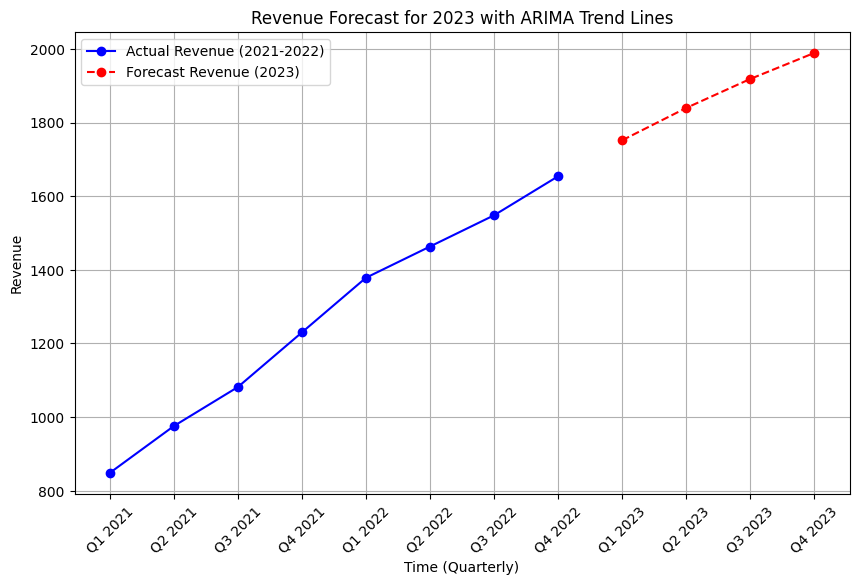

In [ ]:
# Plot the actual and forecasted values
plt.figure(figsize=(10, 6))
x_actual = np.arange(len(actual_revenue))  # X-axis for actual values (2022-2023)
plt.plot(x_actual, actual_revenue, label='Actual Revenue (2021-2022)', color='blue', linestyle='-', marker='o')

# X-axis for forecasted values (2023)
x_forecast = np.arange(len(actual_revenue), len(combined_revenue))  # Continue from the end of actual values
plt.plot(x_forecast, forecast, label='Forecast Revenue (2023)', color='red', linestyle='--', marker='o')

# Customize the plot
plt.xticks(ticks=np.arange(len(time_labels)), labels=time_labels, rotation=45)
plt.title('Revenue Forecast for 2023 with ARIMA Trend Lines')
plt.xlabel('Time (Quarterly)')
plt.ylabel('Revenue')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()

In [ ]:
# Forecast for 2023 - SARIMA
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
import matplotlib.pyplot as plt

In [ ]:
# Step 2: Load the dataset (assuming you already have the dataset loaded into 'data')
# We'll use the quarterly revenue columns from the data
data = pd.read_csv('/content/telecom_survey_data_quarterly_2021_23.csv')

# Step 3: Prepare the data for SARIMA
# We'll use actual quarterly revenue from 2021 and 2022 for building the model and forecasting
actual_revenue = data[['Q1_REV_AMT_2021', 'Q2_REV_AMT_2021', 'Q3_REV_AMT_2021', 'Q4_REV_AMT_2021',
                       'Q1_REV_AMT_2022', 'Q2_REV_AMT_2022', 'Q3_REV_AMT_2022', 'Q4_REV_AMT_2022']].mean(axis=0)

In [ ]:
# Step 4: Train the SARIMA model
# Define the SARIMA model parameters (p, d, q) for non-seasonal part and (P, D, Q, m) for seasonal part
sarima_model = SARIMAX(actual_revenue, order=(1, 1, 1), seasonal_order=(1, 1, 1, 4))

# Fit the model
sarima_result = sarima_model.fit()

# Step 5: Forecast future values (forecasting for 4 quarters in 2023)
forecast_steps = 4
forecast = sarima_result.forecast(steps=forecast_steps)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a 

In [ ]:
# Step 6: Prepare evaluation
# We'll evaluate the SARIMA model's fitted values using the actual revenue data from 2021 and 2022
fitted_values = sarima_result.fittedvalues

# Step 7: Evaluation function
def evaluate_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    mape = mean_absolute_percentage_error(y_true, y_pred)

    print(f"Mean Squared Error (MSE): {mse}")
    print(f"R-Squared (R²): {r2}")
    print(f"Mean Absolute Percentage Error (MAPE): {mape * 100}%")
    print('-' * 50)

# Evaluate the SARIMA model on the actual values from 2021 and 2022
evaluate_model(actual_revenue, fitted_values)

Mean Squared Error (MSE): 105939.82901390127
R-Squared (R²): -0.47248190602745144
Mean Absolute Percentage Error (MAPE): 19.94602865053072%
--------------------------------------------------


In [ ]:
# Step 8: Visualization with Line Trend Chart

# Combine actual and forecasted revenue for plotting
combined_revenue = np.concatenate((actual_revenue, forecast))

# Prepare x-axis labels for plotting
time_labels = ['Q1 2021', 'Q2 2021', 'Q3 2021', 'Q4 2021', 'Q1 2022', 'Q2 2022', 'Q3 2022', 'Q4 2022',
               'Q1 2023', 'Q2 2023', 'Q3 2023', 'Q4 2023']

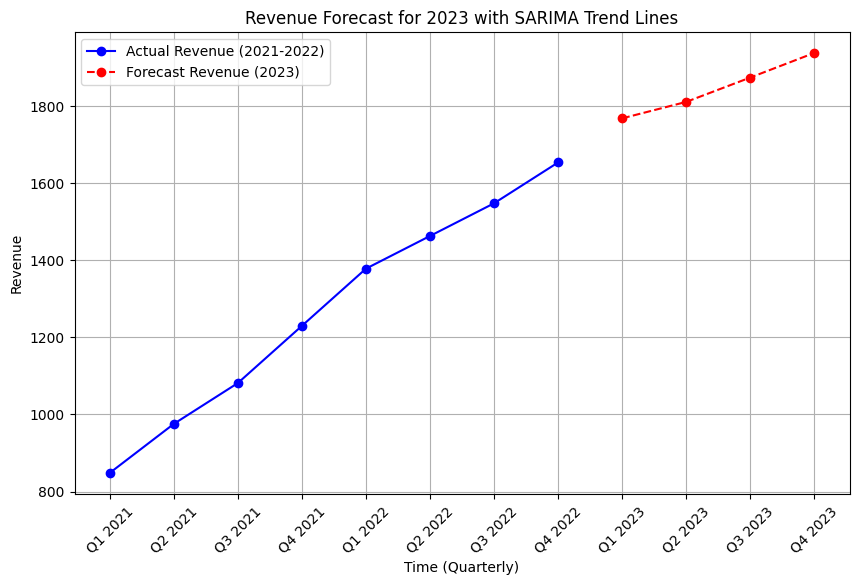

In [ ]:
# Plot the actual and forecasted values
plt.figure(figsize=(10, 6))
x_actual = np.arange(len(actual_revenue))  # X-axis for actual values (2022-2023)
plt.plot(x_actual, actual_revenue, label='Actual Revenue (2021-2022)', color='blue', linestyle='-', marker='o')

# X-axis for forecasted values (2024)
x_forecast = np.arange(len(actual_revenue), len(combined_revenue))  # Continue from the end of actual values
plt.plot(x_forecast, forecast, label='Forecast Revenue (2023)', color='red', linestyle='--', marker='o')

# Customize the plot
plt.xticks(ticks=np.arange(len(time_labels)), labels=time_labels, rotation=45)
plt.title('Revenue Forecast for 2023 with SARIMA Trend Lines')
plt.xlabel('Time (Quarterly)')
plt.ylabel('Revenue')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()

In [ ]:
# prompt: print the forecast for all the bus_name in the dataframe format

import pandas as pd

# Assuming your forecast data is stored in a variable named 'forecast'
# and your DataFrame with bus_names is named 'data'


# Create a DataFrame with the bus_names and corresponding forecasts
forecast_df = pd.DataFrame({'bus_name': data['BUS_NAME'].unique(),
                            '2023Q1_forecast': forecast[0],
                            '2023Q2_forecast': forecast[1],
                            '2023Q3_forecast': forecast[2],
                            '2023Q4_forecast': forecast[3]})

# Print the DataFrame
print(forecast_df)

In [ ]:
# Compare the actual revenue and 2023 forecasted revenue and print the difference, kindly include the bus_name, 2023 revenue, forecast and difference

# Assuming your data is in a DataFrame called 'data'
data = pd.read_csv('/content/telecom_survey_data_quarterly_2021_23.csv')

# Calculate the actual 2023 revenue for each bus_name
revenue_columns_2023 = ['Q1_REV_AMT_2023', 'Q2_REV_AMT_2023', 'Q3_REV_AMT_2023', 'Q4_REV_AMT_2023']
data['2023_revenue'] = data[revenue_columns_2023].sum(axis=1)


In [ ]:
# Create a DataFrame with the bus_names and corresponding forecasts
# Assuming your 'forecast' variable contains the forecasted revenue for each quarter of 2023
forecast_df = pd.DataFrame({'bus_name': data['BUS_NAME'].unique(),
                            '2023Q1_forecast': forecast[0],
                            '2023Q2_forecast': forecast[1],
                            '2023Q3_forecast': forecast[2],
                            '2023Q4_forecast': forecast[3]})

# Calculate the total 2023 forecasted revenue
forecast_df['2023_forecast'] = forecast_df[['2023Q1_forecast', '2023Q2_forecast', '2023Q3_forecast', '2023Q4_forecast']].sum(axis=1)

# Merge the actual revenue and forecast data based on bus_name
comparison_df = pd.merge(data[['BUS_NAME', '2023_revenue']], forecast_df[['bus_name', '2023_forecast']], left_on='BUS_NAME', right_on='bus_name')

# Calculate the difference between actual and forecasted revenue
comparison_df['difference'] = comparison_df['2023_revenue'] - comparison_df['2023_forecast']

# Print the comparison DataFrame
print(comparison_df[['BUS_NAME', '2023_revenue', '2023_forecast', 'difference']])

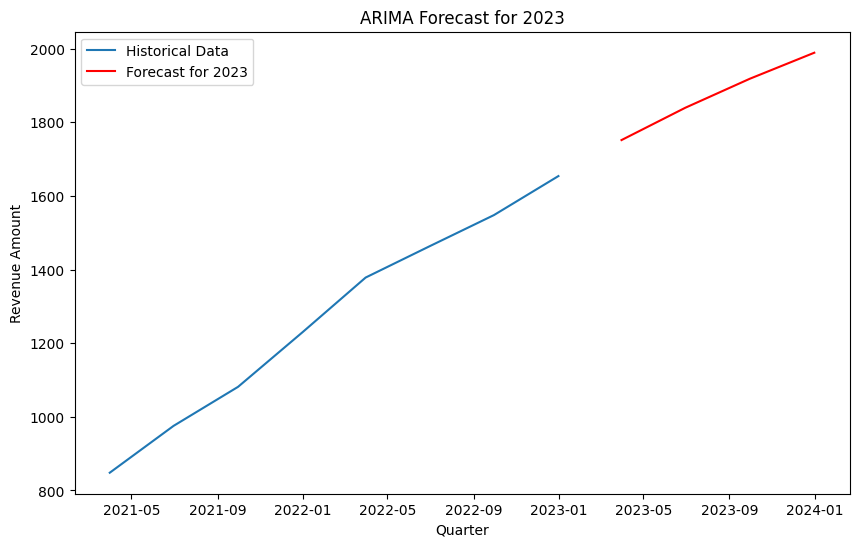

Forecast for 2023Q1: 1751.7953654799646
Forecast for 2023Q2: 1839.558851367942
Forecast for 2023Q3: 1918.3367404328133
Forecast for 2023Q4: 1989.0490160759955


<ipython-input-95-e5466bc9a32e>:43: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Forecast for 2023Q{i+1}: {forecast[i]}")


In [ ]:
# ARIMA Model - Forecast
#Import Key Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Assuming your data is in a DataFrame called 'data'
data = pd.read_csv('/content/telecom_survey_data_quarterly_2021_23.csv')

# Create a time series of quarterly revenue data for 2021 & 2022
revenue_columns = ['Q1_REV_AMT_2021', 'Q2_REV_AMT_2021', 'Q3_REV_AMT_2021', 'Q4_REV_AMT_2021',
                   'Q1_REV_AMT_2022', 'Q2_REV_AMT_2022', 'Q3_REV_AMT_2022', 'Q4_REV_AMT_2022']
revenue_data = data[revenue_columns].mean(axis=0)

# Convert to time series with quarterly index
revenue_data.index = pd.date_range(start='2021Q1', periods=len(revenue_data), freq='Q')


# ARIMA Model Training
p = 1  # Autoregressive term
d = 1  # Differencing
q = 1  # Moving Average term
model = ARIMA(revenue_data, order=(p, d, q))
arima_result = model.fit()

# Forecasting for 2023 (next 4 quarters)
forecast_steps = 4
forecast = arima_result.forecast(steps=forecast_steps)
forecast_index = pd.date_range(start='2023Q1', periods=forecast_steps, freq='Q')

# Plotting the forecast
plt.figure(figsize=(10, 6))
plt.plot(revenue_data, label='Historical Data')
plt.plot(forecast_index, forecast, label='Forecast for 2023', color='red')
plt.title('ARIMA Forecast for 2023')
plt.xlabel('Quarter')
plt.ylabel('Revenue Amount')
plt.legend()
plt.show()

# Print the forecast for each quarter of 2023
for i in range(4):
  print(f"Forecast for 2023Q{i+1}: {forecast[i]}")


In [ ]:
# prompt: print the bus_name only for the positive difference along with the revenue, forecast and difference in the data frame format

# Assuming comparison_df is the DataFrame with 'BUS_NAME', '2023_revenue', '2023_forecast', and 'difference' columns

positive_difference_df = comparison_df[comparison_df['difference'] > 0][['BUS_NAME', '2023_revenue', '2023_forecast', 'difference']]
print(positive_difference_df)


                                     BUS_NAME  2023_revenue  2023_forecast  \
5                  Courtyard Denver Stapleton         17309    7498.739973   
10    RG Bank, A Savings and Loan Association         18079    7498.739973   
11                 Rocky Vista University LLC         22420    7498.739973   
19         Andy & Camille Nack Holding Co Inc          8082    7498.739973   
22                            Novel Coworking         11602    7498.739973   
...                                       ...           ...            ...   
4623                Advanced Gastroenterology         20644    7498.739973   
4624               Colorado Golf & Turf, Inc.          8122    7498.739973   
4627               Foothills Community Church         12653    7498.739973   
4629                 Primesource Staffing LLC         32277    7498.739973   
4632   Baycare Integrated Service Center, LLC         62765    7498.739973   

        difference  
5      9810.260027  
10    10580.260027  
